In [1]:
!pip install PyMuPDF
!pip install gensim nltk matplotlib
!pip install nltk spacy
!pip install bertopic
!python -m spacy download en_core_web_sm
!pip install pyLDAvis
!pip install contractions

import os
import fitz  # PyMuPDF
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import string
import spacy
import re # regular expressions
import matplotlib.pyplot as plt
from google.colab import drive
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import gensim
import contractions

from gensim.corpora import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.ldaseqmodel import LdaSeqModel
from gensim.models import CoherenceModel
from gensim import corpora
from datetime import datetime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 37.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import os
os.makedirs('/root/.kaggle/', exist_ok=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm')
nltk.download('wordnet')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
# Mount Google Drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


### LDA

In [ ]:
# convert PDF in text

#Tranform PDF to text all accepted documents from 2020 to 2024

# Specify the base folder path, modify for either "accepted_all" or "denied_all "
base_folder_path = '/content/drive/My Drive/thesis/nccn_guidelines/submission_requests/denied_all'

# List to hold the text from each PDF
pdf_texts = []

# List to hold the text from each PDF
pdf_count=0


# Walk through all directories and files within the base folder
for root, dirs, files in os.walk(base_folder_path):
    for filename in files:
        # Check if the file is a PDF
        if filename.endswith(".pdf"):
            # Full path to the PDF file
            file_path = os.path.join(root, filename)

            # Open the PDF file
            doc = fitz.open(file_path)

            # Extract text from each page
            text = ""
            for page_num in range(len(doc)):
                page = doc.load_page(page_num)
                text += page.get_text()

            # Append the extracted text to the list
            pdf_texts.append({
                "filename": filename,
                "text": text,
            })

            # Increment the counter
            pdf_count += 1

# Print the total number of PDFs processed
print(f"Total number of PDFs processed: {pdf_count}")

# Display the text and tokenized data extracted from each PDF
for pdf in pdf_texts:
    print(f"Text from {pdf['filename']}:")
    print(pdf['text'][:500])  # Print first 500 characters for brevity
    print("\n---\n")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total number of PDFs processed: 37
Text from 2021_05_28_Ilumina.pdf:
Name: David Eberhard MD, PhD 
Company/Organization: Illumina Inc. 
Address: 5200 Illumina Way, San Diego CA 92122 
Phone: 6503769577 
Email: deberhard@illumina.com 
Date of request: May 28, 2021 
NCCN Guidelines Cutaneous Melanoma 
 
On behalf of Illumina, I respectfully request the NCCN Guideline Panel for Cutaneous Melanoma to 
consider the enclosed information for the inclusion of liquid biopsy-based DNA testing as a 
complimentary alternative to tissue testing for the assessment of genetic v

---

Text from 2021_06_07_BrystolMayers.pdf:
1 
June 07, 2021 
Mary Coffey, PharmD 
Senior Director, WW Scientific Content & Market Capabilities 
Bristol Myers Squibb  
3401 Princeton Pike  
Lawrence, New Jersey 08648 
NCCN Guidelines® Panel: Melanoma Panel 
On behalf of Bristol Myers Squibb, we respectfully request the Melanoma Panel review the data recently 
presented at the American Society of Clinical Oncology (ASCO) 2021

In [ ]:
pdf_texts[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'filename': '2024_02_21_Submission_Melanoma__Cutaneous.pdf',
 'text': 'Prince, Emily\nemily.prince@iovance.com\n6143714737\nFebruary 21, 2024\nCompany: Iovance, Iovance Biotherapeutics, Inc.\n \nGuideline: Melanoma: Cutaneous\n \nPanel: Melanoma Panel\n \nAlgorithm Page Number: MELSYS 1 of 7, page 52\n \nSpecific Change Recommended:\nPlease consider the inclusion of lifileucel in the guideline as a Preferred Regimen for second-line or \nsubsequent therapy for patients with unresectable or metastatic melanoma along with the accompanying \nfootnote: "Includes tumor resection for the manufacture of lifileucel as well as it\'s infusion."  \n \nFDA Clearance: On February 16, 2024, the US Food and Drug Administration granted approval of \nAMTAGVI™ (lifileucel) for the treatment of adult patients with unresectable or metastatic melanoma \npreviously treated with a PD-1 blocking antibody, and if BRAF V600 mutation positive, a BRAF inhibitor \nwith or without a MEK inhibitor. This indication i

In [ ]:
def preprocess_text(pdf_texts):
    """
    Preprocesses text by tokenizing, lowercasing, removing stop words, removing abbreviations, and lemmatizing.

    Parameters:
    pdf_texts (dict): Dictionary containing "filename" and "text".

    Returns:
    dict: Dictionary with the same structure, but the "text" field preprocessed.
    """
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    # Define a list of known abbreviations/low information tokens to remove
    abbreviations = {'pfs', 'co.', 'co', 'also', 'vs', 'vs.', 'ok', 'etc.', 'v', 'n=', "''", 'et.', 'al', 'et', '--', 'o', "'s", "fig", "figure", 'til', 'le'}

    processed_texts = {}

    for entry in pdf_texts:
        text = entry['text']

        # Lowercase the text
        text = text.lower()

        # Expand contractions
        text = contractions.fix(text)

        # Remove numbers using regular expression
        text = re.sub(r'\d+', '', text)

        # Tokenize the text
        words = word_tokenize(text)

        # Remove stop words, punctuation, abbreviations, and lemmatize the words
        processed_words = [
            lemmatizer.lemmatize(word) #Lemmas are always actual words, reduces words to their base dictionary form
            for word in words
            if word not in stop_words and word not in string.punctuation
            and word not in abbreviations and len(word) > 1  # Remove abbreviations and single letters
        ]

        # Add the processed tokenized text back to the dictionary with the filename
        processed_texts[entry['filename']] = processed_words

    return processed_texts


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#Preprocess text test
processed_texts = preprocess_text(pdf_texts)

# Extract the tokenized texts as a list of lists
tokenized_texts = list(processed_texts.values())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Create a Dictionaty and a Corpus


# Create a Dictionary from the tokenized documents
dictionary = Dictionary(tokenized_texts)

# Print the dictionary to verify
#print(dictionary)

# Filter out too rare and too common words
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Convert the tokenized documents into a bag-of-words corpus
corpus = [dictionary.doc2bow(doc) for doc in tokenized_texts]
#print(corpus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


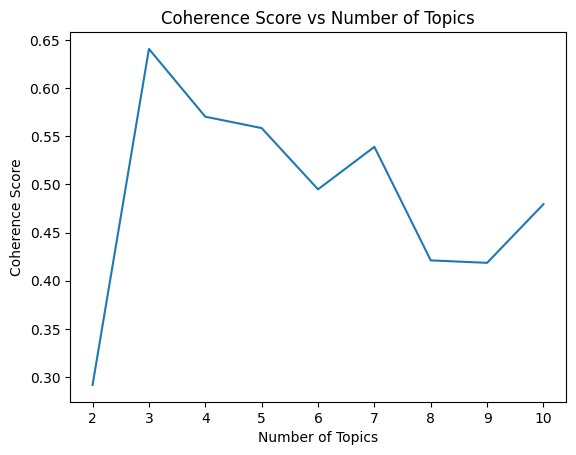

Number of Topics: 2, Coherence Score: 0.2918662373354328
Number of Topics: 3, Coherence Score: 0.6405395283829863
Number of Topics: 4, Coherence Score: 0.5702056944992177
Number of Topics: 5, Coherence Score: 0.5583917495461822
Number of Topics: 6, Coherence Score: 0.4948251035421727
Number of Topics: 7, Coherence Score: 0.5389026149258654
Number of Topics: 8, Coherence Score: 0.42109736745422943
Number of Topics: 9, Coherence Score: 0.4185623712249328
Number of Topics: 10, Coherence Score: 0.479435535062687


In [ ]:
# build a coherence list and model list to evaluate the number of optimal topics
coherence_values = []
model_list = []
min_topics = 2
max_topics = 10

for num_topics in range(min_topics, max_topics + 1):
    # Build the LDA model
    lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
    model_list.append(lda_model)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherence_values.append(coherence_lda)

# Plotting the coherence scores
x = range(min_topics, max_topics + 1)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs Number of Topics")
plt.show()

# Optional: Print the coherence scores for each number of topics
for i, num in enumerate(x):
    print(f"Number of Topics: {num}, Coherence Score: {coherence_values[i]}")


In [ ]:
#Build LDA model with the optimal number of topics based on coherence score

# Find the maximum coherence score and the corresponding number of topics
max_coherence = max(coherence_values)
optimal_topics = coherence_values.index(max_coherence) + min_topics
print(f'Optimal Number of Topics: {optimal_topics}')
print(f'Max Coherence Score: {max_coherence}')


# Build the optimal LDA model using the optimal number of topics
optimal_lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=15)

# Print the topics
topics = optimal_lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Optimal Number of Topics: 3
Max Coherence Score: 0.6405395283829863
(0, '0.044*"therapy" + 0.026*"pembrolizumab" + 0.023*"month" + 0.022*"ci" + 0.022*"survival" + 0.019*"unresectable" + 0.019*"overall" + 0.019*"advanced" + 0.017*"response" + 0.016*"disease"')
(1, '0.070*"pla" + 0.061*"lesion" + 0.056*"biopsy" + 0.036*"pigmented" + 0.020*"diagnostic" + 0.019*"skin" + 0.019*"assay" + 0.017*"negative" + 0.016*"testing" + 0.016*"md"')
(2, '0.041*"expression" + 0.039*"class" + 0.035*"prognostic" + 0.035*"prospective" + 0.024*"profile" + 0.023*"stage" + 0.022*"outcome" + 0.021*"metastasis" + 0.019*"testing" + 0.017*"independent"')


In [ ]:
#Visualization in pyLDAvis
vis_data = gensimvis.prepare(optimal_lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Each circle represents a topic.
Size: corresponds to the prevalence of that topic across the corpus, larger circles indicate more dominant topics.
Distance: indicates topic similarity. Topics that are close to each other share more words and have higher similarity, while those far apart are more distinct.
Red bar - TF - frequency of word in selected topic
Blue bar - DF - frequency of word in corpus.
Saliency - A word that appears frequently in one specific topic but not common in others, helps to differentiate topics effectively

### Dynamic topic modeling

In [ ]:

#Run for loading data, and getting time slices

# Specify the base folder path , valid inputs "accepted_all"/ 'denied_all"
base_folder_path = '/content/drive/My Drive/thesis/nccn_guidelines/submission_requests/denied_all'

# List to hold the text and corresponding timestamps from each PDF
pdf_texts = []
timestamps = []

# Counter to keep track of the number of processed PDFs
pdf_count = 0

# Regular expression pattern to extract timestamp from filename (assuming format YYYY-MM-DD)
timestamp_pattern = r'\d{4}_\d{2}_\d{2}'

# Walk through all directories and files within the base folder
for root, dirs, files in os.walk(base_folder_path):
    for filename in files:
        # Check if the file is a PDF
        if filename.endswith(".pdf"):
            # Full path to the PDF file
            file_path = os.path.join(root, filename)

            # Attempt to extract the timestamp from the filename
            match = re.search(timestamp_pattern, filename)
            if match:
                timestamp = datetime.strptime(match.group(), '%Y_%m_%d')
                timestamps.append(timestamp)
            else:
                # Handle cases where the timestamp isn't found, you can choose to skip or set a default
                print(f"Timestamp not found in filename: {filename}")
                continue  # Skip this file if timestamp is mandatory

            # Open the PDF file
            doc = fitz.open(file_path)

            # Extract text from each page
            text = ""
            for page_num in range(len(doc)):
                page = doc.load_page(page_num)
                text += page.get_text()

            # Append the extracted text and timestamp to the list
            pdf_texts.append({
                "filename": filename,
                "timestamp": timestamp,
                "text": text,
            })

            # Increment the counter
            pdf_count += 1

# Print the total number of PDFs processed
print(f"Total number of PDFs processed: {pdf_count}")



NameError: name 'os' is not defined

In [ ]:
#Preprocess function with timestamp

def preprocess_text(pdf_texts):
    """
    Preprocesses text by tokenizing, lowercasing, removing stop words, removing abbreviations, and lemmatizing.

    Parameters:
    pdf_texts (dict): Dictionary containing "filename" and "text and "timestamp"

    Returns:
    list: List of dictionaries with the same structure, but the "text" field preprocessed.
    """
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    # Define a list of known abbreviations/low information tokens to remove
    abbreviations = {'pfs', 'co.', 'co', 'also', 'vs', 'vs.', 'ok', 'etc.', 'v', 'n=', "''", 'et.', 'al', 'et', '--', 'o', "'s", "fig", "figure", 'til', 'le'}

    processed_texts = []

    for entry in pdf_texts:
        text = entry['text']

        # Lowercase the text
        text = text.lower()

        # Expand contractions
        text = contractions.fix(text)

        # Remove numbers using regular expression
        text = re.sub(r'\d+', '', text)

        # Tokenize the text
        words = word_tokenize(text)

        # Remove stop words, punctuation, abbreviations, and lemmatize the words
        processed_words = [
            lemmatizer.lemmatize(word) #Lemmas are always actual words, reduces words to their base dictionary form
            for word in words
            if word not in stop_words and word not in string.punctuation
            and word not in abbreviations and len(word) > 1  # Remove abbreviations and single letters
        ]

        # Add the processed tokenized text back to the dictionary with the filename and timestamp
        processed_texts.append({
            'filename': entry['filename'],
            'timestamp': entry['timestamp'],
            'text': processed_words,  # Storing as a list of words, you can join them if you prefer a single string

        })

    return processed_texts

processed_texts = preprocess_text(pdf_texts)
print(processed_texts)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[{'filename': '2021_05_28_Ilumina.pdf', 'timestamp': datetime.datetime(2021, 5, 28, 0, 0), 'text': ['name', 'david', 'eberhard', 'md', 'phd', 'company/organization', 'illumina', 'inc.', 'address', 'illumina', 'way', 'san', 'diego', 'ca', 'phone', 'email', 'deberhard', 'illumina.com', 'date', 'request', 'may', 'nccn', 'guideline', 'cutaneous', 'melanoma', 'behalf', 'illumina', 'respectfully', 'request', 'nccn', 'guideline', 'panel', 'cutaneous', 'melanoma', 'consider', 'enclosed', 'information', 'inclusion', 'liquid', 'biopsy-based', 'dna', 'testing', 'complimentary', 'alternative', 'tissue', 'testing', 'assessment', 'genetic', 'variant', 'tumor', 'tissue', 'unavailable', 'specific', 'change', 'red', 'text', 'me-c', 'add', 'new', 'sub-bullet', 'point', 'principle', 'molecular', 'testing', 'section', 'method', 'mutation', 'testing', 'mutation', 'testing', 'may', 'performed', 'using', 'tumor', 'tissue', 'ctdna', 'peripheral', 'blood', 'liquid', 'biopsy', 'liquid', 'biopsy', 'negative', 't

### Using Gensim LdaSecModel

In [ ]:
#Run for finding optimal number of topics with best coherence score

processed_texts = preprocess_text(pdf_texts)

# Extract the preprocessed text and timestamps from processed_texts
documents = [entry['text'] for entry in processed_texts]
timestamps = [entry['timestamp'] for entry in processed_texts]  # Extract timestamps


# Convert documents into gensim format
dictionary = Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Convert timestamps to integers for time slices (e.g., year, month, etc.)
time_slices = [ts.year for ts in timestamps]  # Access the year attribute of the datetime object

# Get unique time slices and their counts
unique_time_slices = sorted(set(time_slices))
time_slices_lengths = [time_slices.count(year) for year in unique_time_slices]

# Function to compute coherence for a given number of topics
def compute_coherence_for_topics(num_topics):
    ldaseq = LdaSeqModel(corpus=corpus, id2word=dictionary, time_slice=time_slices_lengths, num_topics=num_topics)

    # Get the topics for each time slice
    topics_per_timeslice = [ldaseq.print_topics(time=t) for t in range(len(unique_time_slices))]

    # Flatten the list of topics and convert to the required format for CoherenceModel
    topics = [[word for word, prob in topic] for timeslice_topics in topics_per_timeslice for topic in timeslice_topics]

    # Compute coherence score
    coherence_model_ldaseq = CoherenceModel(topics=topics, texts=documents, dictionary=dictionary, coherence='c_v')
    coherence = coherence_model_ldaseq.get_coherence()
    return coherence

# Test different numbers of topics to find the best coherence score
topic_range = range(2, 21, 2)  # Testing with 2, 4, 6, ..., 20 topics
best_num_topics = 0
best_coherence_score = 0

for num_topics in topic_range:
    coherence_score = compute_coherence_for_topics(num_topics)
    print(f'Num Topics: {num_topics}, Coherence Score: {coherence_score}')

    if coherence_score > best_coherence_score:
        best_coherence_score = coherence_score
        best_num_topics = num_topics

print(f'\nBest Coherence Score: {best_coherence_score} with {best_num_topics} topics')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyboardInterrupt: 

In [ ]:
# Extract the preprocessed text and timestamps from processed_texts
documents = [entry['text'] for entry in processed_texts]
timestamps = [entry['timestamp'] for entry in processed_texts]  # Extract timestamps


# Convert documents into gensim format
dictionary = Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]


# Convert timestamps to integers for time slices (e.g., year, month, etc.)
time_slices = [ts.year for ts in timestamps]

# Get unique time slices and their counts
unique_time_slices = sorted(set(time_slices))
time_slices_lengths = [time_slices.count(year) for year in unique_time_slices]

# Initialize LdaSeqModel
num_topics = 10  # from coherence score
ldaseq = LdaSeqModel(corpus=corpus, id2word=dictionary, time_slice=time_slices_lengths, num_topics=num_topics)

# Print the topics for each time slice
for t in range(len(unique_time_slices)):
    print(f"\nTopics for year {unique_time_slices[t]}:")
    for topic_id in range(num_topics):
        topic_terms = ldaseq.print_topic(topic_id, time=t)
        print(f"Topic {topic_id}: {topic_terms}")

# Get the topics for each time slice
topics_per_timeslice = [ldaseq.print_topics(time=t) for t in range(len(unique_time_slices))]

# Flatten the list of topics and convert to the required format for CoherenceModel
topics = [[word for word, prob in topic] for timeslice_topics in topics_per_timeslice for topic in timeslice_topics]

documents = [entry['text'] for entry in processed_texts]   # List of tokenized documents
coherence_model_ldaseq = gensim.models.CoherenceModel(topics=topics, texts=documents, dictionary=dictionary, coherence='c_v')
coherence = coherence_model_ldaseq.get_coherence()
print(f'\nCoherence Score: {coherence}')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gensim/models/ldaseqmodel.py:298: RuntimeWarning: divide by zero encountered in scalar divide
  convergence = np.fabs((bound - old_bound) / old_bound)



Topics for year 201:
Topic 0: [('patient', 0.030394853014731674), ('melanoma', 0.027730650373850908), ('risk', 0.015114608626343133), ('-gep', 0.014393449668244618), ('expression', 0.013660857537312302), ('gep', 0.013249962561234107), ('class', 0.012611730986324926), ('test', 0.011887833369276688), ('study', 0.01174611655176095), ('prognostic', 0.011707903183783185), ('cutaneous', 0.011063854693303808), ('slnb', 0.01057396185845648), ('staging', 0.009759443981620312), ('result', 0.00948423045047171), ('prospective', 0.009227270075587903), ('stage', 0.009211555051519516), ('profile', 0.008513605385958703), ('outcome', 0.007753178764732287), ('metastasis', 0.0074930910941936315), ('clinical', 0.00733002337758367)]
Topic 1: [('patient', 0.023037378430851522), ('melanoma', 0.019132680416665278), ('clinical', 0.009208239117531785), ('lifileucel', 0.009159778020030806), ('therapy', 0.0076434121424913785), ('lesion', 0.006939961419664312), ('cancer', 0.006890732700604385), ('clin', 0.0066645

Dictionary for DLDA for accepted requests

In [ ]:
topic_terms_by_year_accepted = { '2020': {
'Topic 0': [('melanoma', 0.027093063490646482), ('patient', 0.026437448856950468), ('clinically', 0.007683065755360841), ('therapy', 0.007594842942187769), ('nivolumab', 0.006487550269356947), ('metastatic', 0.004219172367164452), ('treatment', 0.004044256715414212), ('month', 0.003978894296299443), ('data', 0.003911492511098493), ('arm', 0.0038384532686855867), ('group', 0.003724863851710714), ('nivo', 0.0034810633023822624), ('pembrolizumab', 0.0034226388519623795), ('event', 0.003315390067820802), ('panel', 0.0032852263783868063), ('request', 0.003178322109302293), ('stage', 0.0030642782544908972), ('study', 0.003042845707364989), ('ci', 0.00300508228936036), ('``', 0.0029761820430707726)],
'Topic 1': [('dosing', 0.029042620778766782), ('mg', 0.022846751933408745), ('cancer', 0.020637658189226436), ('mg/kg', 0.0191517850423742), ('pembrolizumab', 0.016938994780843295), ('week', 0.016721129749501597), ('every', 0.01527075345574962), ('dose', 0.012224995145342721), ('patient', 0.011571305112034254), ('doi', 0.011446276950019917), ('guideline', 0.010517700917552383), ('lung', 0.010070452161797725), ('vial', 0.009392841048037628), ('based', 0.00903198832139347), ('weight', 0.008658987031134035), ('drug', 0.008643397977812564), ('fixed', 0.008630573839126247), ('fda', 0.008396703058177357), ('nccn', 0.008370245149300386), ('pharmacokinetic', 0.007925351738067127)],
'Topic 2': [('tecentriq', 0.024914745211440086), ('melanoma', 0.023350996131106493), ('group', 0.023295925517220515), ('patient', 0.02272787256262524), ('treatment', 0.017054450938278048), ('genentech', 0.013840247306065628), ('control', 0.013179567303471888), ('cotellic', 0.011403197506882456), ('zelboraf', 0.0114031768200566), ('information', 0.01110006651087568), ('fda-approved', 0.00983489454879156), ('metastatic', 0.009727239034890003), ('nccn', 0.009607204785923995), ('vemurafenib', 0.008972307231305893), ('http', 0.008941274481973668), ('interferon', 0.00876314259960176), ('month', 0.008505237280379219), ('panel', 0.008230378582838769), ('arm', 0.008126774836733143), ('analysis', 0.00796865081001705)],
'Topic 3': [('-year', 0.45931860430539356), ('melanoma', 0.005348744196097864), ('metastatic', 0.0035714094253469), ('patient', 0.0033798792436686626), ('treatment', 0.003061903523298459), ('nivolumab', 0.0024547074933492807), ('arm', 0.0021218976734143874), ('therapy', 0.002019136637288344), ('ci', 0.0018782972578574595), ('information', 0.0018496240752835598), ('pembrolizumab', 0.0018454153246530514), ('unresectable', 0.0018147280580866163), ('o', 0.0017419367710889435), ('group', 0.0016848098689763987), ('rate', 0.00166136291571432), ('study', 0.0016052061292946337), ('request', 0.001576797553971942), ('cancer', 0.0015286188834734231), ('data', 0.0015072478513289812), ('phase', 0.0014829921342462901)],
'Topic 4': [('patient', 0.026233600131630553), ('pbo', 0.018381149128318775), ('guardant', 0.016759104242079288), ('tumor', 0.012838307112581477), ('cancer', 0.012600927721197261), ('panel', 0.011280579669098505), ('tissue', 0.010398287997596189), ('melanoma', 0.009779101426136985), ('ctdna', 0.007671917844498137), ('testing', 0.007468525518576633), ('guideline', 0.007380347785998904), ('study', 0.007178706881511591), ('clinical', 0.007087211820271053), ('response', 0.0070704178634306055), ('molecular', 0.006765796150867824), ('trial', 0.006529419867517429), ('mutation', 0.00634882986648436), ('iv', 0.006004067313753284), ('published', 0.005930784025941873), ('cdx', 0.005860593574283725)],
'Topic 5': [('melanocytic', 0.02445647136300534), ('gene', 0.022876035886121086), ('expression', 0.02127480788542512), ('melanoma', 0.018100763822408973), ('clarke', 0.01493293477344048), ('signature', 0.014932912776210363), ('test', 0.014930674547918094), ('clinical', 0.013351097762191021), ('lesion', 0.011771160227899539), ('diagnostic', 0.011771160227591978), ('benign', 0.011771160223299418), ('pathol', 0.011771160221134818), ('patient', 0.011769191462234598), ('ambiguous', 0.010193570788169772), ('result', 0.01019349607946623), ('nevus', 0.010193336750924438), ('mypath®', 0.01019061865708835), ('case', 0.010189225253871498), ('neoplasm', 0.01018897819531103), ('outcome', 0.008618341402157033)],
'Topic 6': [('patient', 0.036127599516414186), ('lifileucel', 0.027543722502813357), ('therapy', 0.026913757473833223), ('melanoma', 0.02437767730811065), ('lymphocyte', 0.018192377953685942), ('cell', 0.01718748805479317), ('tumor-infiltrating', 0.01461716360841241), ('cancer', 0.01451485357242828), ('efficacy', 0.012382710788400121), ('inhibitor', 0.011786682466678517), ('metastatic', 0.011317282103048353), ('advanced', 0.011130683414718946), ('tumor', 0.011112101298943518), ('response', 0.010000314059351702), ('study', 0.009915999888925064), ('safety', 0.009499494451597638), ('adoptive', 0.008222583080938251), ('analysis', 0.00822207340965763), ('prior', 0.007710281899162737), ('progression', 0.007377351300212422)],
'Topic 7': [('nivolumab', 0.0311303503294266), ('patient', 0.030386318677052666), ('melanoma', 0.01944593261895336), ('arm', 0.01500783164513736), ('data', 0.013700210584255211), ('nivo', 0.013648156230117125), ('treatment', 0.012003453483369987), ('ci', 0.011734359865339475), ('o', 0.010546309152570045), ('metastatic', 0.00937971711949526), ('relatlimab', 0.009277545564478113), ('unresectable', 0.008238221787996582), ('grade', 0.007779056009788038), ('ipi', 0.007729827906407275), ('ipilimumab', 0.0076092776445538975), ('request', 0.007587925743366465), ('study', 0.007555229795608821), ('squibb', 0.007391807012598507), ('bristol', 0.007376415400169443), ('myers', 0.007376093096390758)],
'Topic 8': [('tebentafusp', 0.02562849847849958), ('melanoma', 0.02253963779928399), ('patient', 0.022152820757129273), ('group', 0.0213542555195257), ('metastatic', 0.01782333647561329), ('ci', 0.017631123179161778), ('uveal', 0.01411180974163244), ('disease', 0.012813852399766132), ('overall', 0.011285341617192352), ('month', 0.010871904139762458), ('treatment', 0.010827212028038786), ('survival', 0.010721059764124156), ('surgery', 0.010622279388216034), ('o', 0.010462026764633153), ('investigator', 0.010365183515295733), ('event', 0.009123888795852613), ('phase', 0.009110085224304126), ('death', 0.008907713104686141), ('pembrolizumab', 0.008518197963120052), ('review', 0.007653904038182959)],
'Topic 9': [('melanoma', 0.036442577139357835), ('pembrolizumab', 0.03388224733819849), ('patient', 0.029831067341259003), ('treatment', 0.014102150023209982), ('stage', 0.013356561938500993), ('information', 0.01329856910291806), ('placebo', 0.012622395992512487), ('request', 0.011545006305286374), ('nccn', 0.011155787880963695), ('inc.', 0.010776417007011608), ('merck', 0.010766694461193518), ('keytruda', 0.0106155486703637), ('panel', 0.010492571653513725), ('month', 0.008953613601825486), ('resected', 0.007708510639869248), ('metastatic', 0.007556784265694703), ('unresectable', 0.0074460682978375785), ('trial', 0.007170338334158736), ('adjuvant', 0.007087233365127409), ('iic', 0.0070073648923819455)],
},
'2021': {
'Topic 0': [('melanoma', 0.027139888494719207), ('patient', 0.026511272523144724), ('clinically', 0.007737679491578517), ('therapy', 0.007617839935650938), ('nivolumab', 0.0064986067898939355), ('metastatic', 0.004224931291130161), ('treatment', 0.004049641862556011), ('month', 0.003984141289423778), ('data', 0.003916597927245992), ('arm', 0.0038434063016831613), ('group', 0.003729582087922394), ('nivo', 0.0034852869285857614), ('pembrolizumab', 0.0034267459166139845), ('event', 0.0033192852204689226), ('panel', 0.0032890624203032004), ('request', 0.0031819504282062125), ('stage', 0.0030676881081654218), ('study', 0.0030462148744297593), ('ci', 0.0030083800583360566), ('``', 0.0029812268437373673)],
'Topic 1': [('dosing', 0.02930471370603434), ('mg', 0.022898334107350805), ('cancer', 0.020764121203666015), ('mg/kg', 0.019303062446207175), ('pembrolizumab', 0.017010329251459413), ('week', 0.016742137540251778), ('every', 0.015322988346091831), ('dose', 0.012235386058689145), ('patient', 0.011581979750698378), ('doi', 0.011457469453477332), ('guideline', 0.010524801168069694), ('lung', 0.010085953010732186), ('vial', 0.0093995122635853), ('based', 0.00903520870858624), ('weight', 0.008666535038978266), ('fixed', 0.008647956509274432), ('drug', 0.008646131430170133), ('fda', 0.008407816883279766), ('nccn', 0.008372503547995718), ('pharmacokinetic', 0.007926790338255411)],
'Topic 2': [('tecentriq', 0.024495287410380786), ('melanoma', 0.0234739350680518), ('group', 0.02303783873548046), ('patient', 0.022950818899163568), ('treatment', 0.01707238795109342), ('genentech', 0.013718429961220963), ('control', 0.013189953495174161), ('zelboraf', 0.011324889762927361), ('cotellic', 0.011324696583054883), ('information', 0.011116154277450116), ('fda-approved', 0.009806856647624982), ('metastatic', 0.009692732677529523), ('nccn', 0.009617196760284613), ('interferon', 0.009018956793806179), ('http', 0.008936145092235693), ('vemurafenib', 0.008924261561759217), ('month', 0.008481263444932826), ('panel', 0.008243211480558107), ('arm', 0.008166339321708042), ('analysis', 0.007976369464701252)],
'Topic 3': [('-year', 0.46079348422466504), ('melanoma', 0.005345909550588394), ('metastatic', 0.0035683815633109845), ('patient', 0.0033768671838798883), ('treatment', 0.003058936826644071), ('nivolumab', 0.002451902312331711), ('arm', 0.0021192296623796787), ('therapy', 0.002016519006347013), ('ci', 0.0018757554087319643), ('information', 0.001847098653213388), ('pembrolizumab', 0.0018428923431180093), ('unresectable', 0.0018122231006728945), ('o', 0.0017394762137848414), ('group', 0.00168238582896694), ('rate', 0.0016589543020676639), ('study', 0.0016028355284967114), ('request', 0.0015744467686628857), ('cancer', 0.001526302628335009), ('data', 0.0015049472934193452), ('phase', 0.001480709681478957)],
'Topic 4': [('patient', 0.026276341212020125), ('pbo', 0.018393495403922298), ('guardant', 0.016796030299824488), ('tumor', 0.012859241968368133), ('cancer', 0.012620013907775186), ('panel', 0.011295507937620956), ('tissue', 0.010411660325903417), ('melanoma', 0.009789774083971093), ('ctdna', 0.007682697143840279), ('testing', 0.0074763176650092045), ('guideline', 0.0073875039428680225), ('study', 0.007187351571437323), ('clinical', 0.007094253297217391), ('response', 0.007078235439797955), ('molecular', 0.00677391947343512), ('trial', 0.006534687271517437), ('mutation', 0.006353375839591251), ('iv', 0.006008951133599653), ('published', 0.005936856199238471), ('health', 0.005867117532488498)],
'Topic 5': [('melanocytic', 0.024503283688202475), ('gene', 0.022928593818582872), ('expression', 0.021315125593083295), ('melanoma', 0.01813279652540107), ('clarke', 0.014955723685979716), ('test', 0.014955703598831858), ('signature', 0.01495568603700432), ('clinical', 0.013372095196174664), ('lesion', 0.011787877185974769), ('diagnostic', 0.011787877185367944), ('benign', 0.011787877176835347), ('pathol', 0.011787877172519785), ('patient', 0.011785602069909017), ('result', 0.010207827687908675), ('nevus', 0.010207046133239663), ('ambiguous', 0.010206955021041346), ('mypath®', 0.010204879523721162), ('neoplasm', 0.010203909156653469), ('case', 0.010203081479991), ('outcome', 0.008629811888543403)],
'Topic 6': [('patient', 0.036230126782170344), ('lifileucel', 0.02759984871097426), ('therapy', 0.026945659896125896), ('melanoma', 0.024402177499589162), ('lymphocyte', 0.01821458629952036), ('cell', 0.017206501356074547), ('tumor-infiltrating', 0.014633129058039087), ('cancer', 0.014530933672334349), ('efficacy', 0.012396522743794353), ('inhibitor', 0.011797501950068639), ('metastatic', 0.011329684665240012), ('advanced', 0.011142470983905892), ('tumor', 0.011123725230209077), ('response', 0.0100112513258755), ('study', 0.009926503396182918), ('safety', 0.009508662847525504), ('adoptive', 0.008229811782948283), ('analysis', 0.008229473645505771), ('prior', 0.00771744661319986), ('progression', 0.007382911865379757)],
'Topic 7': [('patient', 0.03169680620033185), ('nivolumab', 0.031103473233263772), ('melanoma', 0.01946370374444656), ('arm', 0.01504259501394145), ('data', 0.013724761496000366), ('nivo', 0.013543569465889593), ('treatment', 0.011751192876837287), ('ci', 0.011331497660436613), ('o', 0.010550570240242026), ('metastatic', 0.00937319332445363), ('relatlimab', 0.009207894511838333), ('unresectable', 0.008090123838290457), ('ipi', 0.007852178981506608), ('grade', 0.007705494808074813), ('ipilimumab', 0.007655540109973213), ('request', 0.0076369588673723425), ('study', 0.007515116427037554), ('squibb', 0.0074197133175809594), ('bristol', 0.007404154592662398), ('myers', 0.007403828056329469)],
'Topic 8': [('tebentafusp', 0.026479366870681878), ('melanoma', 0.022498984552936536), ('patient', 0.022351741964993472), ('group', 0.02081773429562643), ('metastatic', 0.018162750845306903), ('ci', 0.01781790861600962), ('uveal', 0.014367971267638852), ('disease', 0.012866905711961692), ('overall', 0.01139704843890408), ('month', 0.010985713108038649), ('treatment', 0.010842059412516139), ('survival', 0.010742694852209316), ('o', 0.010599652614120042), ('investigator', 0.01031391830374725), ('surgery', 0.010233879358381203), ('phase', 0.009179874816893014), ('event', 0.008970587575905582), ('death', 0.008854046518108097), ('pembrolizumab', 0.008479419720050741), ('review', 0.0076766162114414995)],
'Topic 9': [('melanoma', 0.03717670980842337), ('pembrolizumab', 0.03403018662667252), ('patient', 0.030694171250035138), ('treatment', 0.0142682263277771), ('stage', 0.013549116930427754), ('information', 0.013301276274216253), ('placebo', 0.012342437243290632), ('request', 0.011529495612871322), ('nccn', 0.011034576047271163), ('inc.', 0.010791893347129057), ('merck', 0.010785597588776698), ('keytruda', 0.010723312775373778), ('panel', 0.010421849844153255), ('month', 0.00881482705147863), ('resected', 0.007803955621196374), ('metastatic', 0.007459251523068844), ('unresectable', 0.007371616296045842), ('trial', 0.007212588611565046), ('iic', 0.007130431115642625), ('adjuvant', 0.007127100127667673)],
},
'2022': {
'Topic 0': [('melanoma', 0.02719688070678248), ('patient', 0.02657223124234568), ('clinically', 0.007726370762245956), ('therapy', 0.007635665411431061), ('nivolumab', 0.006506964443448222), ('metastatic', 0.004229302377400506), ('treatment', 0.004053731388543861), ('month', 0.003988126732280862), ('data', 0.003920476699959471), ('arm', 0.003847170252768982), ('group', 0.003733169097630087), ('nivo', 0.0034885011142301715), ('pembrolizumab', 0.0034298722220280887), ('event', 0.0033222517367894515), ('panel', 0.0032919843601244875), ('request', 0.0031847157021892346), ('stage', 0.0030702885822348406), ('study', 0.003048784652555344), ('ci', 0.003010895967220988), ('``', 0.002985560578791686)],
'Topic 1': [('dosing', 0.029599031695423463), ('mg', 0.02286104928251538), ('cancer', 0.02087998636000901), ('mg/kg', 0.019514008277177267), ('pembrolizumab', 0.01705996417405717), ('week', 0.01665743468492128), ('every', 0.015323572652157806), ('dose', 0.012297012979588596), ('patient', 0.011585945978284166), ('doi', 0.011480305387992485), ('guideline', 0.010514915279018168), ('lung', 0.010101571773406506), ('vial', 0.009435344400214252), ('based', 0.008993505503624523), ('fixed', 0.008698614563819958), ('drug', 0.008696978563382664), ('weight', 0.008688091623165943), ('fda', 0.00842801526274904), ('nccn', 0.008348829538562124), ('pharmacokinetic', 0.007889531291625024)],
'Topic 2': [('tecentriq', 0.02452734395084002), ('melanoma', 0.023497952853876018), ('group', 0.02308068365187094), ('patient', 0.022981129130653942), ('treatment', 0.01708454851191174), ('genentech', 0.013731654744312776), ('control', 0.01319731186932278), ('zelboraf', 0.011329544066601418), ('cotellic', 0.01132923254188974), ('information', 0.011124349924155206), ('fda-approved', 0.009812878133416641), ('metastatic', 0.009698801069328184), ('nccn', 0.009623031712464078), ('interferon', 0.009024626603409908), ('http', 0.008941510446033635), ('vemurafenib', 0.008929901758490878), ('month', 0.008485205306695718), ('panel', 0.008248726380182786), ('arm', 0.00817270331515569), ('analysis', 0.007980698348540486)],
'Topic 3': [('-year', 0.46179311723918937), ('melanoma', 0.005344713219523561), ('metastatic', 0.0035667418665727875), ('patient', 0.0033752068734034983), ('treatment', 0.003057256477744909), ('nivolumab', 0.0024502392233111516), ('arm', 0.0021176120889468955), ('therapy', 0.002014921435015626), ('ci', 0.0018741902407222472), ('information', 0.0018455408221971057), ('pembrolizumab', 0.0018413356107711677), ('unresectable', 0.0018106745490558869), ('o', 0.0017379482868554415), ('group', 0.0016808753270373513), ('rate', 0.001657451276728914), ('study', 0.0016013511995970787), ('request', 0.001572972331688292), ('cancer', 0.0015248456522439229), ('data', 0.001503498344366402), ('phase', 0.0014792700570922628)],
'Topic 4': [('patient', 0.026321019707719148), ('pbo', 0.018421409715737077), ('guardant', 0.01682443160961275), ('tumor', 0.012868488584398858), ('cancer', 0.012638532111566904), ('panel', 0.01130950043304351), ('tissue', 0.010409888441316503), ('melanoma', 0.009799025176904815), ('ctdna', 0.007688275486028899), ('testing', 0.007484079118355466), ('guideline', 0.007394570908843776), ('study', 0.007194999204051198), ('clinical', 0.007099154631988791), ('response', 0.007082782868127481), ('molecular', 0.0067794781685762235), ('trial', 0.006538349523081275), ('mutation', 0.006359163041105682), ('iv', 0.006010925835019175), ('published', 0.005941982707420192), ('cdx', 0.005869995982357924)],
'Topic 5': [('melanocytic', 0.02453541412926357), ('gene', 0.022970157437033553), ('expression', 0.021340543777118862), ('melanoma', 0.018155237255779798), ('test', 0.014976977224476449), ('clarke', 0.014971603028849104), ('signature', 0.014971524657654655), ('clinical', 0.013387492854515598), ('pathol', 0.011802473980081598), ('benign', 0.011802473832268144), ('diagnostic', 0.011802473541747625), ('lesion', 0.011802473521543705), ('patient', 0.01180044676291646), ('nevus', 0.010219958601649174), ('ambiguous', 0.010219395352778516), ('neoplasm', 0.010218471220063998), ('result', 0.010218253707030023), ('mypath®', 0.010217818199505822), ('case', 0.010215178202950337), ('outcome', 0.008638911734475995)],
'Topic 6': [('patient', 0.03635870379456244), ('lifileucel', 0.02766382246382135), ('therapy', 0.026992043697300946), ('melanoma', 0.02441651013777421), ('lymphocyte', 0.018232061174969158), ('cell', 0.017219804308170883), ('tumor-infiltrating', 0.014648109360612399), ('cancer', 0.014547800790817904), ('efficacy', 0.012411542017326558), ('inhibitor', 0.011808862135510823), ('metastatic', 0.011339294832955062), ('advanced', 0.011151307846138768), ('tumor', 0.011132177109039923), ('response', 0.010019436647886258), ('study', 0.0099346871079385), ('safety', 0.009515172587923877), ('adoptive', 0.008234644555985045), ('analysis', 0.008234545059993591), ('prior', 0.007724091376120684), ('progression', 0.007384723831355056)],
'Topic 7': [('patient', 0.03213974297896357), ('nivolumab', 0.031247523120527903), ('melanoma', 0.01956766542211439), ('arm', 0.014849759447852906), ('data', 0.013783328615477888), ('nivo', 0.013530184203961453), ('treatment', 0.011767487891883368), ('ci', 0.01137217618706181), ('o', 0.010568503262137088), ('metastatic', 0.009369506950490268), ('relatlimab', 0.00914120272470657), ('unresectable', 0.008097387606536522), ('ipi', 0.00789559379578162), ('grade', 0.007741893117853602), ('ipilimumab', 0.007646059550417801), ('request', 0.007633185938072735), ('study', 0.007519958973060182), ('squibb', 0.007470507408037441), ('bristol', 0.007454694111946992), ('myers', 0.007454361935896065)],
'Topic 8': [('tebentafusp', 0.026501537481368086), ('melanoma', 0.022525187771777165), ('patient', 0.022392560245296404), ('group', 0.020801677399044143), ('metastatic', 0.018186691313220548), ('ci', 0.01783653854376911), ('uveal', 0.014379955141374072), ('disease', 0.012881203836271149), ('overall', 0.011407887858076837), ('month', 0.01099354192463736), ('treatment', 0.010851026018420192), ('survival', 0.010751142151161654), ('o', 0.010607401993029687), ('investigator', 0.01032571007838662), ('surgery', 0.010242636619578794), ('phase', 0.009187051146279662), ('event', 0.008976528593257647), ('death', 0.008859145629380888), ('pembrolizumab', 0.008486770101247019), ('review', 0.007681588677226731)],
'Topic 9': [('melanoma', 0.03635625906822346), ('pembrolizumab', 0.03429044312511816), ('patient', 0.030898410813191036), ('treatment', 0.014147773680949823), ('stage', 0.013882838171040529), ('information', 0.013317268013836413), ('placebo', 0.012668823111921463), ('request', 0.011529728517560213), ('nccn', 0.010976880690602927), ('inc.', 0.01083212712841885), ('merck', 0.010819617416382092), ('keytruda', 0.010589061540612241), ('panel', 0.010384602288302533), ('month', 0.00885907493545884), ('resected', 0.00794989949547396), ('metastatic', 0.007356432317045628), ('unresectable', 0.007302403900527449), ('iic', 0.0072376379054815525), ('trial', 0.007206139771548084), ('adjuvant', 0.007173708045151994)],
},

'2023': {
'Topic 0': [('melanoma', 0.027284613496039996), ('patient', 0.026598517268472587), ('clinically', 0.007709548350525238), ('therapy', 0.00763540592582718), ('nivolumab', 0.006512381999107802), ('metastatic', 0.004232120701606118), ('treatment', 0.004056366419797324), ('month', 0.003990694019867109), ('data', 0.003922974568008491), ('arm', 0.003849593405683159), ('group', 0.003735477133423688), ('nivo', 0.0034905666774828334), ('pembrolizumab', 0.0034318806490159764), ('event', 0.0033241562944739925), ('panel', 0.003293859945923874), ('request', 0.0031864894820385634), ('stage', 0.0030719553003595015), ('study', 0.0030504314327504272), ('ci', 0.003012507760578863), ('``', 0.002988873066308646)],
'Topic 1': [('dosing', 0.029913248750350084), ('mg', 0.022843890235326975), ('cancer', 0.02100447098304539), ('mg/kg', 0.019678197317380134), ('pembrolizumab', 0.017112360462621785), ('week', 0.016642845677353257), ('every', 0.01536037186851323), ('dose', 0.012300037169524507), ('patient', 0.011585309531902723), ('doi', 0.011481667871766178), ('guideline', 0.010502373291265223), ('lung', 0.010105706463675049), ('vial', 0.009436503130629307), ('based', 0.008988626866199651), ('fixed', 0.008708572383365466), ('weight', 0.008699767800474002), ('drug', 0.008693757951874345), ('fda', 0.008434079255476635), ('nccn', 0.008341561241926823), ('pharmacokinetic', 0.007880784066383876)],
'Topic 2': [('tecentriq', 0.024549090055658467), ('melanoma', 0.02350444306375347), ('group', 0.023157486253171582), ('patient', 0.022997117573365818), ('treatment', 0.017086325352624204), ('genentech', 0.013739712772884528), ('control', 0.01320183325397964), ('zelboraf', 0.01133702018646531), ('cotellic', 0.011336522899786306), ('information', 0.011125746062748952), ('fda-approved', 0.009817614715923545), ('metastatic', 0.009705239018907236), ('nccn', 0.00962577246304769), ('interferon', 0.009025280462049447), ('http', 0.008946386557377181), ('vemurafenib', 0.00893606632239381), ('month', 0.008489832486308324), ('panel', 0.008250289882943159), ('arm', 0.008175974165689083), ('analysis', 0.007982799389111079)],
'Topic 3': [('-year', 0.46244067073282946), ('melanoma', 0.005344044423137692), ('metastatic', 0.003565739594433571), ('patient', 0.003374186632850089), ('treatment', 0.0030562157866164206), ('nivolumab', 0.0024491961956826167), ('arm', 0.002116591618391971), ('therapy', 0.0020139118615372835), ('ci', 0.0018731989002278402), ('information', 0.0018445536828788887), ('pembrolizumab', 0.0018403491024719693), ('unresectable', 0.0018096927540662516), ('o', 0.0017369784781401502), ('group', 0.001679915743839446), ('rate', 0.0016564961050704998), ('study', 0.0016004071156366301), ('request', 0.0015720341434332075), ('cancer', 0.0015239179152885878), ('data', 0.001502575429580727), ('phase', 0.0014783527568776262)],
'Topic 4': [('patient', 0.026312314126815763), ('pbo', 0.019928537846717758), ('guardant', 0.0165405483388078), ('tumor', 0.01274249762133768), ('cancer', 0.012500657892732072), ('panel', 0.011285023809903282), ('tissue', 0.010305003779516674), ('melanoma', 0.009808207031430514), ('ctdna', 0.007628746408013558), ('testing', 0.007449334338504752), ('guideline', 0.0073595516714190555), ('study', 0.007191470630370123), ('clinical', 0.007057673066887885), ('response', 0.007042363669913704), ('molecular', 0.006731631546883239), ('trial', 0.006549348895521379), ('mutation', 0.006362886034069838), ('iv', 0.006161170940722702), ('ned', 0.005957764571793311), ('published', 0.005934109561217888)],
'Topic 5': [('melanocytic', 0.024560320525212873), ('gene', 0.023011098738539574), ('expression', 0.021363851334962672), ('melanoma', 0.018172544626622322), ('test', 0.014992450012598786), ('clarke', 0.014982323162661857), ('signature', 0.014982212130414308), ('clinical', 0.013399105311213747), ('pathol', 0.011811513418564238), ('benign', 0.011811513116400923), ('diagnostic', 0.011811512522372922), ('lesion', 0.011811512481045424), ('patient', 0.011809266762554253), ('neoplasm', 0.010228360242428451), ('nevus', 0.010227927211778077), ('ambiguous', 0.010226927352247858), ('result', 0.010226505074394597), ('mypath®', 0.010226334322370913), ('case', 0.010223003879784557), ('flake', 0.008646281063955678)],
'Topic 6': [('patient', 0.03644434387262222), ('lifileucel', 0.027690957601086513), ('therapy', 0.027070722830353146), ('melanoma', 0.02440551838905442), ('lymphocyte', 0.018230670568273412), ('cell', 0.017212875823063332), ('tumor-infiltrating', 0.014648442872198238), ('cancer', 0.014612772905857108), ('efficacy', 0.012414454862499202), ('inhibitor', 0.011844333080675442), ('metastatic', 0.0113429244202144), ('advanced', 0.011154657912122867), ('tumor', 0.011134416906116879), ('response', 0.010023824282612259), ('study', 0.009938426028512689), ('safety', 0.009517497571580644), ('analysis', 0.008236808175800272), ('adoptive', 0.008236309936582092), ('prior', 0.0077283439064788), ('progression', 0.007390257888015184)],
'Topic 7': [('patient', 0.032127554425606844), ('nivolumab', 0.031372909958625086), ('melanoma', 0.019676490013236545), ('nivo', 0.014459566071099859), ('arm', 0.014262705414149777), ('data', 0.013817526300784254), ('treatment', 0.011970296440948448), ('ci', 0.011799868248701764), ('o', 0.010537512585352635), ('metastatic', 0.009312075588135585), ('relatlimab', 0.009002401799549368), ('ipi', 0.008306422590523376), ('ipilimumab', 0.008036087307540261), ('grade', 0.007902317618682401), ('unresectable', 0.007900539795758199), ('request', 0.0075750987098583905), ('study', 0.007556795025604108), ('squibb', 0.007517776419156373), ('bristol', 0.007501718798349875), ('myers', 0.007501382264487637)],
'Topic 8': [('tebentafusp', 0.025705243655001948), ('melanoma', 0.022621771366652305), ('patient', 0.022267812231077086), ('group', 0.02132995173524659), ('metastatic', 0.017898222181794612), ('ci', 0.017695226059474416), ('uveal', 0.014153546017132103), ('disease', 0.012854297099910835), ('overall', 0.011320250764929282), ('month', 0.010900700751083287), ('treatment', 0.010855932447967743), ('survival', 0.010747677241853998), ('surgery', 0.01064466518885635), ('o', 0.01048785694028287), ('investigator', 0.010396400959115046), ('event', 0.009138657564774388), ('phase', 0.009133740376847103), ('death', 0.008923937258715552), ('pembrolizumab', 0.008538878488819245), ('review', 0.0076688432861556875)],
'Topic 9': [('melanoma', 0.03665580198920922), ('pembrolizumab', 0.0344342546085624), ('patient', 0.03050132126273612), ('stage', 0.014227806834219193), ('treatment', 0.014039544787343108), ('information', 0.013324653739036863), ('placebo', 0.012982278726925969), ('request', 0.011534948283443928), ('nccn', 0.01106701034646119), ('inc.', 0.010864831616852044), ('merck', 0.010844721689253406), ('keytruda', 0.010587592240762396), ('panel', 0.010411419039507534), ('month', 0.008788394544198769), ('resected', 0.008081610882125669), ('adjuvant', 0.007341611427744664), ('metastatic', 0.007298591009115489), ('iic', 0.007270323345297888), ('unresectable', 0.00724913272538396), ('trial', 0.007188460861718296)],
},
'2024': {
'Topic 0': [('melanoma', 0.027317651540244937), ('patient', 0.026624454441274106), ('clinically', 0.007693619193424954), ('therapy', 0.007626095275599938), ('nivolumab', 0.006515181682087043), ('metastatic', 0.004233590288413202), ('treatment', 0.004057741982562872), ('month', 0.003992034821125622), ('data', 0.0039242797413469865), ('arm', 0.0038508602256674403), ('group', 0.003736684844432066), ('nivo', 0.0034916498168416615), ('pembrolizumab', 0.0034329344193248677), ('event', 0.003325156658187668), ('panel', 0.003294845409302662), ('request', 0.003187422572292173), ('stage', 0.003072833288781193), ('study', 0.0030512991566581595), ('ci', 0.00301335747007419), ('``', 0.002990619238376872)],
'Topic 1': [('dosing', 0.030151157733793968), ('mg', 0.022854667046704056), ('cancer', 0.021105324974419522), ('mg/kg', 0.019789864450088145), ('pembrolizumab', 0.017159286946748772), ('week', 0.01666018484158088), ('every', 0.015404391354646224), ('dose', 0.012300770321673891), ('patient', 0.011583629705369084), ('doi', 0.011479526175148897), ('guideline', 0.010495861832652383), ('lung', 0.010108957914695023), ('vial', 0.009432840804709438), ('based', 0.008987156189970784), ('fixed', 0.008712299448348509), ('weight', 0.008704309719878244), ('drug', 0.008688579601285266), ('fda', 0.008437060284516663), ('nccn', 0.008339843878145414), ('pharmacokinetic', 0.007881669774479662)],
'Topic 2': [('tecentriq', 0.024546710046120242), ('melanoma', 0.0235093586811444), ('group', 0.023205509832385448), ('patient', 0.02301619413746053), ('treatment', 0.01709222409641615), ('genentech', 0.013739119070835736), ('control', 0.013205514533873088), ('zelboraf', 0.011339098600137307), ('cotellic', 0.011338453752498399), ('information', 0.0111296403814952), ('fda-approved', 0.00981840262103445), ('metastatic', 0.009707757855593399), ('nccn', 0.00962857527381027), ('interferon', 0.009029242236424075), ('http', 0.008949287341394252), ('vemurafenib', 0.008937691161580457), ('month', 0.008491682498130752), ('panel', 0.00825288420768157), ('arm', 0.008177982148324823), ('analysis', 0.00798530248190869)],
'Topic 3': [('-year', 0.4628546594714438), ('melanoma', 0.0053427952854862674), ('metastatic', 0.003564629625833626), ('patient', 0.003373100587131242), ('treatment', 0.0030551741165797787), ('nivolumab', 0.0024482574993067185), ('arm', 0.002115721201230267), ('therapy', 0.002013064479466375), ('ci', 0.001872384726586169), ('information', 0.0018437465129598862), ('pembrolizumab', 0.001839542967712087), ('unresectable', 0.0018088942227532257), ('o', 0.0017361983827413753), ('group', 0.0016791505234912947), ('rate', 0.0016557370965416885), ('study', 0.0015996632438477017), ('request', 0.0015712980713404297), ('cancer', 0.0015231952955937146), ('data', 0.0015018588695256364), ('phase', 0.0014776431446500786)],
'Topic 4': [('patient', 0.026327720009305985), ('pbo', 0.019950773785266922), ('guardant', 0.016548189364834973), ('tumor', 0.012741300039847891), ('cancer', 0.012513516488011587), ('panel', 0.011292911108631707), ('tissue', 0.010292781712087208), ('melanoma', 0.009812752379683078), ('ctdna', 0.007629963379967494), ('testing', 0.0074539433527947545), ('guideline', 0.007364630155869799), ('study', 0.007195505883349798), ('clinical', 0.007060379904555594), ('response', 0.0070445120082053255), ('molecular', 0.0067351615361693085), ('trial', 0.006550505234558053), ('mutation', 0.006368103655159124), ('iv', 0.006160611159973924), ('ned', 0.005960063985315324), ('published', 0.005936523323848551)],
'Topic 5': [('melanocytic', 0.024576593238614688), ('gene', 0.02304257538428519), ('expression', 0.021382692501323707), ('melanoma', 0.018184120430029337), ('test', 0.015000892671339257), ('clarke', 0.014988460682938094), ('signature', 0.014988336765232044), ('clinical', 0.01340669788664082), ('pathol', 0.011815796470724959), ('benign', 0.011815796163131671), ('diagnostic', 0.011815795558405739), ('lesion', 0.011815795516337012), ('patient', 0.01181315324497628), ('neoplasm', 0.010233377380603715), ('result', 0.010232258128250805), ('nevus', 0.010231499577952137), ('mypath®', 0.010230624142339436), ('ambiguous', 0.010230133861108439), ('case', 0.01022688888758773), ('flake', 0.008651559532246098)],
'Topic 6': [('patient', 0.036513277745278384), ('lifileucel', 0.027718436562695056), ('therapy', 0.027093456468429915), ('melanoma', 0.024403360796456202), ('lymphocyte', 0.01823370427900359), ('cell', 0.017212184144744392), ('tumor-infiltrating', 0.014652466981603126), ('cancer', 0.014618081508659226), ('efficacy', 0.012420052173174068), ('inhibitor', 0.011849834542828213), ('metastatic', 0.01134680102140428), ('advanced', 0.011157814633170317), ('tumor', 0.011137157698543461), ('response', 0.010027319822997873), ('study', 0.009941815764915065), ('safety', 0.009519764185085397), ('analysis', 0.008238648600142477), ('adoptive', 0.008238123589146476), ('prior', 0.007731461260121937), ('progression', 0.007392524631140755)],
'Topic 7': [('patient', 0.03235731655556669), ('nivolumab', 0.03158861976965604), ('melanoma', 0.019808398118738864), ('nivo', 0.014061017870137181), ('arm', 0.013995377011149274), ('data', 0.013885008873894666), ('ci', 0.01214677684648964), ('treatment', 0.012042227054880046), ('o', 0.010527669861560373), ('metastatic', 0.009280541000701878), ('relatlimab', 0.008940851261827025), ('ipi', 0.008143133575213436), ('grade', 0.008036645306291855), ('ipilimumab', 0.007906922332703431), ('unresectable', 0.007769427946111623), ('study', 0.007631693088094223), ('squibb', 0.007559629076531707), ('request', 0.007549287447537159), ('bristol', 0.0075433522034261844), ('myers', 0.007543011053041763)],
'Topic 8': [('tebentafusp', 0.025628790047853338), ('melanoma', 0.022642748628187506), ('patient', 0.02226326547471655), ('group', 0.02137676008195163), ('metastatic', 0.017901279750456606), ('ci', 0.01770720183011366), ('uveal', 0.014156456090140825), ('disease', 0.01285852687813543), ('overall', 0.011323406900656158), ('month', 0.01090556541190941), ('treatment', 0.010860171162799956), ('survival', 0.010749562462602315), ('surgery', 0.010652151453301681), ('o', 0.01048904363942387), ('investigator', 0.01040090537901443), ('event', 0.00914095896288931), ('phase', 0.009138336962533012), ('death', 0.008931037324619875), ('pembrolizumab', 0.008537802860440782), ('review', 0.007668980608022529)],
'Topic 9': [('melanoma', 0.03674081080982945), ('pembrolizumab', 0.03449529843258196), ('patient', 0.030587641623007235), ('stage', 0.01445942796476434), ('treatment', 0.01404810803390614), ('placebo', 0.013435297775938146), ('information', 0.013331678675764963), ('request', 0.011536642037142764), ('nccn', 0.01109635481615174), ('inc.', 0.010881678795176491), ('merck', 0.010855809496134343), ('keytruda', 0.010540116918723119), ('panel', 0.01041877346238411), ('month', 0.008797392911670069), ('resected', 0.008179736941489256), ('adjuvant', 0.007390587312963702), ('iic', 0.00735628826149486), ('metastatic', 0.007263983512336333), ('unresectable', 0.007217220601225358), ('trial', 0.007201095489206326)]
}
}

### DLDA dictionary for denied topics

In [ ]:

Topics for year 201:
Topic 0: [('patient', 0.030394853014731674), ('melanoma', 0.027730650373850908), ('risk', 0.015114608626343133), ('-gep', 0.014393449668244618), ('expression', 0.013660857537312302), ('gep', 0.013249962561234107), ('class', 0.012611730986324926), ('test', 0.011887833369276688), ('study', 0.01174611655176095), ('prognostic', 0.011707903183783185), ('cutaneous', 0.011063854693303808), ('slnb', 0.01057396185845648), ('staging', 0.009759443981620312), ('result', 0.00948423045047171), ('prospective', 0.009227270075587903), ('stage', 0.009211555051519516), ('profile', 0.008513605385958703), ('outcome', 0.007753178764732287), ('metastasis', 0.0074930910941936315), ('clinical', 0.00733002337758367)]
Topic 1: [('patient', 0.023037378430851522), ('melanoma', 0.019132680416665278), ('clinical', 0.009208239117531785), ('lifileucel', 0.009159778020030806), ('therapy', 0.0076434121424913785), ('lesion', 0.006939961419664312), ('cancer', 0.006890732700604385), ('clin', 0.006664535657861802), ('cell', 0.006608377577289724), ('may', 0.006393397251003606), ('page', 0.006291384525910798), ('lymphocyte', 0.005882470459294243), ('study', 0.005825451360286993), ('care', 0.005789416626131827), ('management', 0.005696220469738797), ('accuracy', 0.005611778999820124), ('tumor-infiltrating', 0.005115701564005591), ('evaluation', 0.005019431762988317), ('center', 0.00500777527912949), ('prior', 0.004811858917283067)]
Topic 2: [('tmb', 0.02512627713028841), ('panel', 0.014142821957173288), ('patient', 0.013293932709637359), ('tumor', 0.01140130105938266), ('group', 0.011383867055954107), ('burden', 0.011376012164050748), ('cancer', 0.010181508883734652), ('ttmb-high', 0.008949781511795565), ('research', 0.008631329813989229), ('pembrolizumab', 0.008135615211247444), ('medicine', 0.008031424135247314), ('requested', 0.007771078717806823), ('across', 0.00713665317534374), ('value', 0.006983885240325684), ('guideline', 0.0065854915142057515), ('ci', 0.006565413329728565), ('rate', 0.006558879259149367), ('fda-approved', 0.006558504067518762), ('mutational', 0.006553493309201024), ('foundation', 0.006551483525261367)]
Topic 3: [('-gene', 0.07384382250987406), ('melanoma', 0.010697063779567147), ('patient', 0.010075380175104029), ('..', 0.007246201723254092), ('study', 0.0058230621852402185), ('expression', 0.004306888828915283), ('test', 0.004296549029303913), ('-gep', 0.004267374729073247), ('risk', 0.003948569170106444), ('clinical', 0.003810941223010368), ('gep', 0.003660024165096663), ('result', 0.003480185230604665), ('class', 0.0031737785760353535), ('cutaneous', 0.003169921762380255), ('prognostic', 0.0031019701600391346), ('biopsy', 0.00310106091951514), ('nccn', 0.0029092824441306247), ('guideline', 0.002752009017171869), ('profile', 0.002684482971717825), ('stage', 0.002596731719391408)]
Topic 4: [('clinical', 0.027913804043923855), ('cancer', 0.024148757343672507), ('patient', 0.02412436261262338), ('melanoma', 0.02307834380862451), ('nccn', 0.020142315586808464), ('dna', 0.019786176418228937), ('testing', 0.01937259705294808), ('tissue', 0.01830915511938433), ('tumor', 0.016256046664254342), ('study', 0.014150833368815991), ('guideline', 0.013445066019380924), ('liquid', 0.012117201757911835), ('braf', 0.012083653702897044), ('ctdna', 0.012049444739332015), ('analysis', 0.011891603259669018), ('may', 0.01091245706490551), ('agreement', 0.010570749695876989), ('biopsy', 0.010293789925963064), ('mutation', 0.00951163777217608), ('molecular', 0.008946007908690566)]
Topic 5: [('ipilimumab', 0.04090207945555785), ('melanoma', 0.028558414278274248), ('sargramostim', 0.025956631254639317), ('patient', 0.020993847972638452), ('survival', 0.01881412055131661), ('metastatic', 0.015195276177452885), ('alone', 0.014749914650759352), ('arm', 0.013829231215524937), ('overall', 0.013336815483875128), ('treatment', 0.012891534912485455), ('month', 0.012590467822592993), ('mg/kg', 0.012196322279955311), ('event', 0.011556520364642818), ('adverse', 0.01045171552951963), ('combination', 0.010210832428095219), ('therapy', 0.009721287810876002), ('compared', 0.009303700090248406), ('trial', 0.008667519959521837), ('doi', 0.007813298035453713), ('advanced', 0.007673001309297636)]
Topic 6: [('pla', 0.036499317728711046), ('melanoma', 0.0299578279378957), ('lesion', 0.029890262848776595), ('biopsy', 0.02588878777228713), ('test', 0.02062337813009261), ('pigmented', 0.01914273202085553), ('utility', 0.011251724834654961), ('evidence', 0.009898779965433901), ('clinical', 0.009890475833282114), ('assay', 0.009342318556190226), ('guideline', 0.008792632887785805), ('cutaneous', 0.008735284937491882), ('panel', 0.008308768666095954), ('patient', 0.008238966858667856), ('clinician', 0.008197853912546028), ('study', 0.007825275939390247), ('skin', 0.007800077362385536), ('nccn', 0.007649140455108083), ('diagnostic', 0.007586860482219407), ('case', 0.007359404845731021)]
Topic 7: [('test', 0.0259441797949926), ('evidence', 0.02188281306879856), ('nccn', 0.017649917370717468), ('decisiondx-um', 0.015473417377459256), ('melanoma', 0.014877654435101974), ('uveal', 0.014141898284304691), ('level', 0.013446003823019649), ('um', 0.01278935074291007), ('prospective', 0.011460629920435898), ('clinical', 0.011428381497391144), ('guideline', 0.011420527935390772), ('risk', 0.011411627772778), ('class', 0.009343454494973893), ('expression', 0.008644444035732102), ('category', 0.007957451250538159), ('patient', 0.00795347905678872), ('gene', 0.007268642940134945), ('prognostic', 0.007268530627390573), ('follow', 0.006742626831444145), ('panel', 0.006584616298254775)]
Topic 8: [('patient', 0.02860232693192175), ('melanoma', 0.027092491597906252), ('therapy', 0.014915367069614873), ('pembrolizumab', 0.013619540753817631), ('treatment', 0.011386529821857875), ('arm', 0.01105401915141011), ('nivo', 0.01058030361260068), ('metastatic', 0.010223134915055759), ('ci', 0.010002396905064586), ('panel', 0.009435120942879063), ('request', 0.009110452598930016), ('ipi', 0.009045524531282514), ('information', 0.009032045579302168), ('unresectable', 0.008358127143742884), ('month', 0.008024165772539452), ('nccn', 0.007936878848612614), ('randomized', 0.007923020237842561), ('keytruda', 0.0070611808807542285), ('disease', 0.006946628698384409), ('systemic', 0.006857831934561207)]
Topic 9: [('-gene', 0.4586948879130445), ('melanoma', 0.006097151631033407), ('patient', 0.005087672533324227), ('test', 0.0023757096670201294), ('guideline', 0.0023627096798170487), ('study', 0.0022486455615793495), ('nccn', 0.002184538548832866), ('evidence', 0.0021701470444617857), ('expression', 0.001969538625888377), ('clinical', 0.0019232295493440315), ('prospective', 0.0017292804901789507), ('biopsy', 0.00169152734880628), ('pla', 0.0016605275835639014), ('cutaneous', 0.0016252801233606416), ('risk', 0.0016104652388027974), ('class', 0.0015762971625625823), ('gep', 0.0015284904276033347), ('panel', 0.001508348326081721), ('gene', 0.0014760278315637434), ('prognostic', 0.0014755081911821688)]

Topics for year 2020:
Topic 0: [('patient', 0.030678864919397374), ('melanoma', 0.027992663935013613), ('risk', 0.015174685807574272), ('-gep', 0.014433842999645207), ('expression', 0.013772766505663678), ('gep', 0.013398999608597419), ('class', 0.012666621531388377), ('test', 0.011980176310660789), ('prognostic', 0.011762226152105459), ('study', 0.011762196587893611), ('cutaneous', 0.01112252502805005), ('slnb', 0.010632922969696802), ('staging', 0.009780581437280856), ('result', 0.009491618839765681), ('prospective', 0.009296557484190764), ('stage', 0.00921225083626732), ('profile', 0.008577278443911896), ('outcome', 0.007792979770713302), ('metastasis', 0.007520897617059564), ('clinical', 0.007368312560234186)]
Topic 1: [('patient', 0.02310893629508219), ('melanoma', 0.01919858866814279), ('clinical', 0.0092246055648492), ('lifileucel', 0.009172233971146042), ('therapy', 0.00766627638272522), ('lesion', 0.006951393964914276), ('cancer', 0.006891614523679002), ('clin', 0.006670392822934094), ('cell', 0.00661944160689854), ('may', 0.006401489057656233), ('page', 0.006299070279269719), ('lymphocyte', 0.005886811709619093), ('study', 0.005832177818714968), ('care', 0.005794658443071362), ('management', 0.005710434075285537), ('accuracy', 0.005620178926809365), ('tumor-infiltrating', 0.005119817286945457), ('evaluation', 0.005031585976055681), ('center', 0.005018258885211064), ('prior', 0.004818536049746388)]
Topic 2: [('tmb', 0.025196398007728434), ('panel', 0.014164759735791652), ('patient', 0.013332412326184904), ('tumor', 0.011424240475522342), ('burden', 0.011413343169786568), ('group', 0.011411860171486243), ('cancer', 0.01020510465555876), ('ttmb-high', 0.0090013027490047), ('research', 0.00864149369200316), ('pembrolizumab', 0.00814755130768784), ('medicine', 0.008040978086354993), ('requested', 0.007787549862648434), ('across', 0.007145286645249132), ('value', 0.006987814730365581), ('guideline', 0.006595002249621114), ('ci', 0.006567822221076369), ('rate', 0.006563741319158805), ('fda-approved', 0.006562288254043499), ('mutational', 0.006561998230406373), ('foundation', 0.00656178025293266)]
Topic 3: [('-gene', 0.0738591169938233), ('melanoma', 0.01072293684221026), ('patient', 0.010099273382002725), ('..', 0.0072547720323459805), ('study', 0.005834351758533181), ('expression', 0.004314214104714), ('test', 0.0043038485725594815), ('-gep', 0.004274601772635662), ('risk', 0.003955014467201468), ('clinical', 0.0038170552292552447), ('gep', 0.003665779407806155), ('result', 0.003485519389257507), ('class', 0.003178412415542554), ('cutaneous', 0.00317454693108084), ('prognostic', 0.003106443172967924), ('biopsy', 0.0031055319044003054), ('nccn', 0.0029133304726371573), ('guideline', 0.002755717609081198), ('profile', 0.0026880479786850387), ('stage', 0.0026001121433215308)]
Topic 4: [('clinical', 0.028165638282329764), ('patient', 0.024194181577596174), ('cancer', 0.024107662885331647), ('melanoma', 0.023095529104714296), ('nccn', 0.020252132448279076), ('dna', 0.01971457398877975), ('testing', 0.01926296553255894), ('tissue', 0.018285759221160013), ('tumor', 0.016212892335241147), ('study', 0.014232174726471663), ('guideline', 0.013452700800408338), ('braf', 0.012059002086158161), ('liquid', 0.012047114168028674), ('ctdna', 0.012017109249147815), ('analysis', 0.011922244825090198), ('may', 0.010898873624524701), ('agreement', 0.01058877375232151), ('biopsy', 0.010306982321981217), ('mutation', 0.009499488841700321), ('molecular', 0.008958644039107129)]
Topic 5: [('ipilimumab', 0.040983697818087084), ('melanoma', 0.028655108357143966), ('sargramostim', 0.026082231407027808), ('patient', 0.02100978462710819), ('survival', 0.01882173918528222), ('metastatic', 0.01521978070276445), ('alone', 0.014791355758261635), ('arm', 0.0138453875523264), ('overall', 0.013351468689687068), ('treatment', 0.012901992087000326), ('month', 0.012623428461292703), ('mg/kg', 0.012213626806269235), ('event', 0.01155687269331228), ('adverse', 0.010464776381133536), ('combination', 0.01023144883345537), ('therapy', 0.009734335502532042), ('compared', 0.00930043672660343), ('trial', 0.008669096854210547), ('doi', 0.007825584403912015), ('advanced', 0.007682310357620731)]
Topic 6: [('pla', 0.036799797748523974), ('lesion', 0.030139777541366406), ('melanoma', 0.030132073027118702), ('biopsy', 0.02610326739368211), ('test', 0.020784178953504356), ('pigmented', 0.019274285938810642), ('utility', 0.011317858125765856), ('evidence', 0.009890712153585243), ('clinical', 0.00989037478541809), ('assay', 0.009334748692525345), ('guideline', 0.008783778498016374), ('cutaneous', 0.008731552536272766), ('panel', 0.008314772898761771), ('patient', 0.008228395677355919), ('clinician', 0.008199044329223058), ('study', 0.007825232496078556), ('skin', 0.007773427128645203), ('nccn', 0.007654605464137503), ('diagnostic', 0.007584024111530841), ('case', 0.0073742209224325625)]
Topic 7: [('test', 0.026066223526215643), ('evidence', 0.021965409426523894), ('nccn', 0.017719478911780065), ('decisiondx-um', 0.015537027148075842), ('melanoma', 0.014940564380564535), ('uveal', 0.014181174819253491), ('level', 0.013480747615216547), ('um', 0.012812981261161439), ('prospective', 0.011485346869911813), ('clinical', 0.011443551984197473), ('guideline', 0.011438918985633631), ('risk', 0.011435324704573735), ('class', 0.009353127358489944), ('expression', 0.008658934488908738), ('category', 0.007964276401824724), ('patient', 0.007959907585832062), ('gene', 0.007272976673488925), ('prognostic', 0.007272109135601659), ('follow', 0.00674580637366073), ('panel', 0.006587835695945161)]
Topic 8: [('patient', 0.028703130849684844), ('melanoma', 0.02683288187473765), ('therapy', 0.015926130478159245), ('pembrolizumab', 0.013677928199678174), ('treatment', 0.01146301513597881), ('arm', 0.011397466971972385), ('metastatic', 0.010394925273124543), ('ci', 0.010170159908297756), ('nivo', 0.010169396409296693), ('panel', 0.00941397083524047), ('information', 0.009063230074635067), ('request', 0.009060238566070862), ('ipi', 0.008640962100836145), ('unresectable', 0.008474200208145601), ('month', 0.008081794873711532), ('randomized', 0.007963267693773384), ('nccn', 0.00794022075416498), ('keytruda', 0.007102394284719164), ('disease', 0.0070341035614992055), ('systemic', 0.00697662786613364)]
Topic 9: [('-gene', 0.46020180015044854), ('melanoma', 0.00609512553972723), ('patient', 0.005085257024242682), ('test', 0.00237315817853471), ('guideline', 0.002360161955133642), ('study', 0.002246133310973533), ('nccn', 0.002182048220741817), ('evidence', 0.0021676618398223974), ('expression', 0.0019671328959955446), ('clinical', 0.0019208443939992275), ('prospective', 0.0017269912973161272), ('biopsy', 0.0016892587695447319), ('pla', 0.0016582764256976126), ('cutaneous', 0.001623049327896089), ('risk', 0.0016082431807008246), ('class', 0.0015740956663405723), ('gep', 0.0015263186820551609), ('panel', 0.0015061894654429932), ('gene', 0.0014738900899060848), ('prognostic', 0.001473370793586767)]

Topics for year 2021:
Topic 0: [('patient', 0.030936318426470977), ('melanoma', 0.028261204738483734), ('risk', 0.015168063871825031), ('-gep', 0.014384858708645613), ('gep', 0.0140046157189668), ('expression', 0.013891451356403677), ('class', 0.012677650727604755), ('test', 0.012115912524821635), ('study', 0.011982868070375236), ('prognostic', 0.011867010991005811), ('cutaneous', 0.011269051726234214), ('slnb', 0.010657121764286959), ('staging', 0.009706251572298609), ('prospective', 0.009703563666903402), ('result', 0.009328712243302234), ('stage', 0.009187493912157941), ('profile', 0.00864202421742184), ('outcome', 0.007817479621841648), ('metastasis', 0.007522938502216563), ('clinical', 0.007430841404208665)]
Topic 1: [('patient', 0.023162938725340056), ('melanoma', 0.019280046178879517), ('clinical', 0.009305634270703687), ('lifileucel', 0.008948328982049093), ('therapy', 0.007689927167668348), ('lesion', 0.007012312073274337), ('cancer', 0.006853475053249544), ('clin', 0.006610207477940476), ('cell', 0.006545426130042237), ('may', 0.006427620543479397), ('page', 0.006320028240500125), ('study', 0.005839369208542961), ('lymphocyte', 0.005823105502138024), ('care', 0.005793629490169656), ('management', 0.005790947502946755), ('accuracy', 0.005575267298305778), ('tumor-infiltrating', 0.005097774409117921), ('center', 0.005058962033291352), ('evaluation', 0.005056996625517381), ('prior', 0.004823042230281412)]
Topic 2: [('tmb', 0.025334162179397074), ('panel', 0.014191854460998451), ('patient', 0.01329744432861845), ('burden', 0.011447824221824032), ('group', 0.011426032088231479), ('tumor', 0.01142320074507052), ('cancer', 0.010223918726028163), ('ttmb-high', 0.009046905442967112), ('research', 0.00857121078334794), ('pembrolizumab', 0.008173554281401596), ('medicine', 0.00802171256201836), ('requested', 0.007859374498399773), ('across', 0.0071484135973049), ('value', 0.006994513162164502), ('guideline', 0.00660502206963339), ('mutational', 0.006579969206114595), ('foundation', 0.0065793537988123535), ('rate', 0.006571683961467716), ('fda-approved', 0.006568823667956563), ('ci', 0.006512453184684481)]
Topic 3: [('-gene', 0.07370938054271961), ('melanoma', 0.01074392700849359), ('patient', 0.01011868901567683), ('..', 0.007270607017449979), ('study', 0.0058436973832010405), ('expression', 0.00432036391557748), ('test', 0.004309977559485355), ('-gep', 0.004280672082704077), ('risk', 0.0039604514017220005), ('clinical', 0.003822223345289401), ('gep', 0.0036706561121479476), ('result', 0.0034900536264091233), ('class', 0.0031823759088187476), ('cutaneous', 0.0031785033476966103), ('prognostic', 0.0031102753641914557), ('biopsy', 0.0031093624392883015), ('nccn', 0.0029168152256517053), ('guideline', 0.002758924318492055), ('profile', 0.002691136912101661), ('stage', 0.0026030495196010537)]
Topic 4: [('clinical', 0.028178096379268342), ('patient', 0.02422243867990776), ('cancer', 0.024141957312312112), ('melanoma', 0.02303372614061393), ('nccn', 0.020305377862409938), ('dna', 0.01978801230561779), ('testing', 0.019475681296996693), ('tissue', 0.018389628656508467), ('tumor', 0.016414108740201393), ('study', 0.014231171048357149), ('guideline', 0.013536536726732691), ('ctdna', 0.01210090452198137), ('braf', 0.012054666736663817), ('liquid', 0.012048678174130164), ('analysis', 0.011921047083154697), ('may', 0.010903216344555195), ('agreement', 0.010592936061949247), ('biopsy', 0.010311692961382908), ('mutation', 0.009493288110941063), ('molecular', 0.008954913376117644)]
Topic 5: [('ipilimumab', 0.04108930808980319), ('melanoma', 0.028728320363746195), ('sargramostim', 0.02620142244538502), ('patient', 0.020997237982445977), ('survival', 0.018876766805444544), ('metastatic', 0.015195153638198487), ('alone', 0.01482949880677824), ('arm', 0.013886238754850575), ('overall', 0.013389235543021752), ('treatment', 0.012907094331012932), ('month', 0.012644536394724194), ('mg/kg', 0.012244049279870724), ('event', 0.01158300293402381), ('adverse', 0.01047482999108425), ('combination', 0.01024755575402304), ('therapy', 0.009714088662916825), ('compared', 0.009319124688498255), ('trial', 0.008660839753552231), ('doi', 0.007837404706400422), ('advanced', 0.0076629360985395936)]
Topic 6: [('pla', 0.037346355203023124), ('melanoma', 0.03086012950014991), ('lesion', 0.030579144802658467), ('biopsy', 0.02644964744259254), ('test', 0.020932107943965033), ('pigmented', 0.019375012039492153), ('utility', 0.011399453921633098), ('clinical', 0.010083975073138289), ('evidence', 0.009755046856774852), ('assay', 0.00920291266775725), ('cutaneous', 0.008811906972992408), ('guideline', 0.008757213547391696), ('panel', 0.00826822815135748), ('patient', 0.008222824736216015), ('clinician', 0.008119367468960114), ('study', 0.0077478163629519274), ('skin', 0.007677957579399925), ('nccn', 0.0076753241787596675), ('diagnostic', 0.007547423694373199), ('case', 0.007362408477960172)]
Topic 7: [('test', 0.02617673421886141), ('evidence', 0.02202943929366597), ('nccn', 0.017779100904714042), ('decisiondx-um', 0.015594949520770708), ('melanoma', 0.014999446028786667), ('uveal', 0.014206999424808723), ('level', 0.01350220324826682), ('um', 0.012822864187175518), ('prospective', 0.01149800156612815), ('clinical', 0.011449716496396745), ('risk', 0.01144716115794674), ('guideline', 0.011445803766949479), ('class', 0.009357153025933533), ('expression', 0.008665684088447525), ('category', 0.007967808397089191), ('patient', 0.007963655336497339), ('gene', 0.007275135643831212), ('prognostic', 0.0072740119374640165), ('follow', 0.0067476190655290525), ('panel', 0.006589557105024059)]
Topic 8: [('patient', 0.028852400713251902), ('melanoma', 0.026690489919369186), ('therapy', 0.01567363413503011), ('pembrolizumab', 0.013866684422732837), ('treatment', 0.011490073116856665), ('arm', 0.011487465641054531), ('metastatic', 0.01036858567383485), ('ci', 0.01023363308000272), ('nivo', 0.010207450314860742), ('panel', 0.00948310951539232), ('request', 0.009125142112032391), ('information', 0.009118082048012366), ('ipi', 0.008686037847565546), ('unresectable', 0.008534713518909491), ('month', 0.008108705378499333), ('randomized', 0.00796919959967719), ('nccn', 0.007944544063864292), ('keytruda', 0.007137291876917935), ('disease', 0.007076291168366602), ('systemic', 0.007003364769287957)]
Topic 9: [('-gene', 0.461233255651777), ('melanoma', 0.006094561100093629), ('patient', 0.005084248817291087), ('test', 0.002371633039307757), ('guideline', 0.002358637612351682), ('study', 0.0022446177722869895), ('nccn', 0.002180539101637523), ('evidence', 0.002166154311602615), ('expression', 0.0019656535152284154), ('clinical', 0.0019193731623289851), ('prospective', 0.0017255614524066781), ('biopsy', 0.0016878384138530442), ('pla', 0.0016568642286826105), ('cutaneous', 0.0016216468178533144), ('risk', 0.0016068448746880972), ('class', 0.0015727073604309084), ('gep', 0.0015249450948812845), ('panel', 0.001504822339096075), ('gene', 0.0014725336593416185), ('prognostic', 0.0014720145383323477)]

Topics for year 2022:
Topic 0: [('patient', 0.03128104413731951), ('melanoma', 0.02857113937949531), ('risk', 0.01521772892453504), ('-gep', 0.014399645948957323), ('gep', 0.014119424087913262), ('expression', 0.014020512188624806), ('class', 0.012719359771058722), ('test', 0.012218259636654362), ('study', 0.01199328626820738), ('prognostic', 0.01193876834420865), ('cutaneous', 0.011331878455411353), ('slnb', 0.010720628015783273), ('prospective', 0.009734121490114512), ('staging', 0.00972334364822127), ('result', 0.009322050822961255), ('stage', 0.009171513851246033), ('profile', 0.008718175873760553), ('outcome', 0.007858195361786653), ('metastasis', 0.0075451943144381455), ('clinical', 0.007472849301368779)]
Topic 1: [('patient', 0.023183718811213488), ('melanoma', 0.019372547189674752), ('clinical', 0.00939344217671469), ('lifileucel', 0.008909776555472709), ('therapy', 0.0077116741086499935), ('lesion', 0.0070231600236412145), ('cancer', 0.006830279792807431), ('clin', 0.006596471401294014), ('cell', 0.006527206765856217), ('may', 0.006418073659031671), ('page', 0.00632458926325876), ('study', 0.005845674517064441), ('management', 0.005821591766159581), ('lymphocyte', 0.005812940886318587), ('care', 0.005803751672098204), ('accuracy', 0.005563037756232605), ('tumor-infiltrating', 0.00509860720782789), ('evaluation', 0.005075421830924893), ('center', 0.0050638364275004755), ('prior', 0.004826578623487907)]
Topic 2: [('tmb', 0.025166589639975312), ('panel', 0.014209109991579275), ('patient', 0.013302928470156482), ('burden', 0.011438038160981944), ('group', 0.011400805863546963), ('tumor', 0.011385656280201073), ('cancer', 0.010208303364073338), ('ttmb-high', 0.009089124352378372), ('research', 0.008556010201286482), ('pembrolizumab', 0.008157523553288732), ('medicine', 0.00800250408275238), ('requested', 0.00792117122971158), ('across', 0.007138517964957051), ('value', 0.006988637075188062), ('guideline', 0.006619126177165078), ('foundation', 0.006575652908018424), ('mutational', 0.006575464661754559), ('rate', 0.006559011408220556), ('fda-approved', 0.0065550241300613675), ('melanoma', 0.006505791091109748)]
Topic 3: [('-gene', 0.07349314187373834), ('melanoma', 0.010759054187932054), ('patient', 0.010132701693230904), ('..', 0.007293330640156789), ('study', 0.005850551638758357), ('expression', 0.004324927866545303), ('test', 0.004314526535496281), ('-gep', 0.00428517885850316), ('risk', 0.003964502221582013), ('clinical', 0.0038260803883229722), ('gep', 0.00367430289967771), ('result', 0.003493453044132845), ('class', 0.003185362319766275), ('cutaneous', 0.00318148463131185), ('prognostic', 0.0031131666135954692), ('biopsy', 0.00311225248787764), ('nccn', 0.002919454368488956), ('guideline', 0.0027613613643098288), ('profile', 0.0026934882503153066), ('stage', 0.002605290470960906)]
Topic 4: [('clinical', 0.028178629196426677), ('patient', 0.02430166370365603), ('cancer', 0.02418044504000895), ('melanoma', 0.023014079297802324), ('nccn', 0.020317117732175365), ('dna', 0.019815352416110793), ('testing', 0.019491233167182962), ('tissue', 0.018378480927768448), ('tumor', 0.016482186691555344), ('study', 0.014242031799180828), ('guideline', 0.013604900510227374), ('ctdna', 0.01212754313085186), ('braf', 0.012063005696405784), ('liquid', 0.012023802599103108), ('analysis', 0.011930143220247573), ('may', 0.010903162392627288), ('agreement', 0.010592949479015176), ('biopsy', 0.010319515259353216), ('mutation', 0.009497670889884421), ('molecular', 0.008953185036949765)]
Topic 5: [('ipilimumab', 0.04114345722362082), ('melanoma', 0.0287743960866214), ('sargramostim', 0.026229487594423267), ('patient', 0.021001431418531773), ('survival', 0.018889561489226436), ('metastatic', 0.0151897661037381), ('alone', 0.014842167753120639), ('arm', 0.01389699790521116), ('overall', 0.013401654071018858), ('treatment', 0.012911866430610546), ('month', 0.012653570242367613), ('mg/kg', 0.012253024185933162), ('event', 0.011597088441605528), ('adverse', 0.010480868943681148), ('combination', 0.010256510568588595), ('therapy', 0.009716936995388994), ('compared', 0.009325657268695964), ('trial', 0.008661930956328556), ('doi', 0.007843469027069427), ('advanced', 0.007667688626854855)]
Topic 6: [('pla', 0.03773332817042918), ('melanoma', 0.03132766467068082), ('lesion', 0.030841298992903058), ('biopsy', 0.02673765212011798), ('test', 0.02109499361664777), ('pigmented', 0.01952096866949378), ('utility', 0.011486159179164611), ('clinical', 0.01020065736548343), ('evidence', 0.009701693690133835), ('assay', 0.00917966423341223), ('cutaneous', 0.008830574452239831), ('guideline', 0.008732724710705846), ('panel', 0.008253818593266333), ('patient', 0.00817831804750404), ('clinician', 0.008140427165478034), ('study', 0.007724527637016439), ('nccn', 0.0076666526068192705), ('skin', 0.007651418453640808), ('diagnostic', 0.007574777781905742), ('case', 0.0073745703200002845)]
Topic 7: [('test', 0.026254410259540444), ('evidence', 0.022066699872001907), ('nccn', 0.017818116612553333), ('decisiondx-um', 0.01563516053589579), ('melanoma', 0.015041458120693114), ('uveal', 0.01421802742193293), ('level', 0.013510098513475554), ('um', 0.012822351068911234), ('prospective', 0.011500035146654953), ('clinical', 0.01145028657335143), ('risk', 0.01144880802790783), ('guideline', 0.011444709988282393), ('class', 0.009357727513723085), ('expression', 0.0086661842273766), ('category', 0.007970585432469297), ('patient', 0.0079660922342876), ('gene', 0.00727662722661525), ('prognostic', 0.007275511566153615), ('follow', 0.006749652024170681), ('panel', 0.006590947516383231)]
Topic 8: [('patient', 0.02903588228759148), ('melanoma', 0.02705226877828693), ('therapy', 0.015503425274216092), ('pembrolizumab', 0.01419179639148201), ('treatment', 0.011523871126524289), ('arm', 0.011375349033426876), ('metastatic', 0.01038804536256149), ('nivo', 0.010214617433111518), ('ci', 0.010174101991251683), ('panel', 0.009589337077307379), ('information', 0.009226655564506015), ('request', 0.00922180652393496), ('ipi', 0.008609475648456042), ('unresectable', 0.00860850262537299), ('month', 0.008064830787001744), ('nccn', 0.008013221086579899), ('randomized', 0.007921307197882413), ('keytruda', 0.0072316939328592525), ('disease', 0.007041457857177875), ('systemic', 0.006958220283109023)]
Topic 9: [('-gene', 0.4619030132879818), ('melanoma', 0.006094312940244532), ('patient', 0.005083686607708422), ('test', 0.0023706738366267056), ('guideline', 0.0023576786721112436), ('study', 0.002243662335352435), ('nccn', 0.0021795866064686364), ('evidence', 0.002165202575830976), ('expression', 0.0019647163126388545), ('clinical', 0.0019184404063223486), ('prospective', 0.0017246521163570869), ('biopsy', 0.0016869345838407613), ('pla', 0.0016559651622823936), ('cutaneous', 0.0016207534390136975), ('risk', 0.0016059539739572944), ('class', 0.0015718223760980109), ('gep', 0.001524068868996757), ('panel', 0.0015039499748350236), ('gene', 0.001471667708684339), ('prognostic', 0.0014711486930025787)]

Topics for year 2024:
Topic 0: [('patient', 0.03155375762208152), ('melanoma', 0.028805866555869013), ('risk', 0.015274648875350664), ('-gep', 0.014434360177066856), ('expression', 0.014117334161338842), ('gep', 0.014093590650485177), ('class', 0.012762278034769594), ('test', 0.012284644488061996), ('study', 0.01199628024019126), ('prognostic', 0.011981791809064233), ('cutaneous', 0.011363662137142723), ('slnb', 0.010779910620873422), ('staging', 0.009739637187913895), ('prospective', 0.009686409606658708), ('result', 0.009317061388427701), ('stage', 0.009161109581561137), ('profile', 0.008776930916181178), ('outcome', 0.007893929285490993), ('metastasis', 0.007569353046849511), ('clinical', 0.007499451595489688)]
Topic 1: [('patient', 0.023226754255480687), ('melanoma', 0.019428340917660155), ('clinical', 0.009402768009264505), ('lifileucel', 0.008944870449041829), ('therapy', 0.007733163916160492), ('lesion', 0.007025823263921622), ('cancer', 0.006833063260512294), ('clin', 0.00660530692535082), ('cell', 0.006534832894990923), ('may', 0.006418415529180653), ('page', 0.006326566307573412), ('study', 0.005851048607627883), ('management', 0.0058234032100538706), ('lymphocyte', 0.005821839320033054), ('care', 0.005810069227261917), ('accuracy', 0.005568948849325066), ('tumor-infiltrating', 0.00510797243264052), ('evaluation', 0.005087079211865403), ('center', 0.005073212120293498), ('prior', 0.0048332845318360355)]
Topic 2: [('tmb', 0.025200529897518396), ('panel', 0.014213011321357326), ('patient', 0.013333838228090738), ('burden', 0.01144712518403588), ('group', 0.011397576242991316), ('tumor', 0.011373818996285997), ('cancer', 0.010214719081249072), ('ttmb-high', 0.009126958518499585), ('research', 0.008564628661340706), ('pembrolizumab', 0.008165311842375228), ('medicine', 0.008002121154173385), ('requested', 0.007938838874744178), ('across', 0.0071422024488880225), ('value', 0.006983305744609681), ('guideline', 0.0066257609340173015), ('foundation', 0.006581207147115492), ('mutational', 0.006580341948613655), ('rate', 0.006558107336467525), ('fda-approved', 0.006553144929349364), ('ci', 0.006497803511922989)]
Topic 3: [('-gene', 0.07330412065573817), ('melanoma', 0.010767532840771954), ('patient', 0.010140570151642162), ('..', 0.007305341845823881), ('study', 0.005854478391803521), ('expression', 0.004327579993446714), ('test', 0.004317170291341137), ('-gep', 0.004287799021127784), ('risk', 0.0039668671573288745), ('clinical', 0.003828336669291789), ('gep', 0.0036764411481346377), ('result', 0.0034954522265960367), ('class', 0.003187128783992629), ('cutaneous', 0.0031832482018243928), ('prognostic', 0.0031148793517074896), ('biopsy', 0.003113964547765395), ('nccn', 0.002921024559678308), ('guideline', 0.0027628170407420116), ('profile', 0.0026948952899818464), ('stage', 0.002606634801038481)]
Topic 4: [('clinical', 0.028263219094555845), ('patient', 0.024384877852296136), ('cancer', 0.024227248632496652), ('melanoma', 0.022982980410922806), ('nccn', 0.02033052648185063), ('dna', 0.019836813839153714), ('testing', 0.019476254986767673), ('tissue', 0.018367302234375184), ('tumor', 0.016543017613905846), ('study', 0.014244167905580533), ('guideline', 0.013649223836973822), ('ctdna', 0.012155597476549557), ('braf', 0.012060572592964953), ('liquid', 0.012005735155542012), ('analysis', 0.011934975197432076), ('may', 0.010913302499864073), ('agreement', 0.010595391463312584), ('biopsy', 0.01032149488517512), ('mutation', 0.009495438378780178), ('molecular', 0.0089521170315398)]
Topic 5: [('ipilimumab', 0.041190739028515944), ('melanoma', 0.028814462214932453), ('sargramostim', 0.026232972108017474), ('patient', 0.02100856883615695), ('survival', 0.018889294577497173), ('metastatic', 0.015190008792880676), ('alone', 0.014847831534493958), ('arm', 0.013897832760126513), ('overall', 0.01340516127092013), ('treatment', 0.012916691647279514), ('month', 0.012662412703695738), ('mg/kg', 0.012254376203616048), ('event', 0.011602651685391095), ('adverse', 0.010486053271533104), ('combination', 0.010262742391161728), ('therapy', 0.00971955350284622), ('compared', 0.00932686152397021), ('trial', 0.008663794516386802), ('doi', 0.007847352176561538), ('advanced', 0.00767110896358886)]
Topic 6: [('pla', 0.037947073051279825), ('melanoma', 0.03142230410635709), ('lesion', 0.030992055502840885), ('biopsy', 0.02691757110114778), ('test', 0.021232852809424992), ('pigmented', 0.019644630903459276), ('utility', 0.011542221025907446), ('clinical', 0.010187735999141658), ('evidence', 0.009702891208576005), ('assay', 0.009164738026717457), ('cutaneous', 0.008813566575246472), ('guideline', 0.008712693104343954), ('panel', 0.008259686902875037), ('patient', 0.008172873485643627), ('clinician', 0.008160998097885), ('study', 0.007724841430529378), ('nccn', 0.007663286769775141), ('skin', 0.007635725345357723), ('diagnostic', 0.007571539797696961), ('case', 0.007389609961039004)]
Topic 7: [('test', 0.026312623300202384), ('evidence', 0.022096950828078648), ('nccn', 0.01784873928462483), ('decisiondx-um', 0.015666175514506185), ('melanoma', 0.015073570191166084), ('uveal', 0.0142289448396548), ('level', 0.013518731378875323), ('um', 0.0128245964876903), ('prospective', 0.01150428901121358), ('risk', 0.011452670199145306), ('clinical', 0.011451874784672949), ('guideline', 0.011446385254577958), ('class', 0.009358840457659907), ('expression', 0.0086686406427937), ('category', 0.007972577133578258), ('patient', 0.007967789311140089), ('gene', 0.007277504036247624), ('prognostic', 0.0072760087277367515), ('follow', 0.006751041839256641), ('panel', 0.006591529584127105)]
Topic 8: [('patient', 0.02920273099493049), ('melanoma', 0.026957959439345945), ('therapy', 0.01558495960006836), ('pembrolizumab', 0.014244798745355575), ('treatment', 0.011549406835327706), ('arm', 0.011380031362242093), ('metastatic', 0.010402635826876798), ('nivo', 0.010266339313871244), ('ci', 0.010160286302337031), ('panel', 0.009635939309954565), ('information', 0.009253648987363802), ('request', 0.009218661921268832), ('unresectable', 0.008632454917174561), ('ipi', 0.008605552269128774), ('month', 0.008065122890989275), ('nccn', 0.00800758970766175), ('randomized', 0.007931135946612884), ('keytruda', 0.007234225030603055), ('disease', 0.0070477131225921774), ('systemic', 0.006959743234028873)]
Topic 9: [('-gene', 0.46232020154574804), ('melanoma', 0.006093234038755565), ('patient', 0.005082609951727794), ('test', 0.0023698251681454597), ('guideline', 0.0023568321722662673), ('study', 0.0022428354598359986), ('nccn', 0.002178771243527562), ('evidence', 0.0021643898465387858), ('expression', 0.0019639422554306265), ('clinical', 0.0019176758185008597), ('prospective', 0.0017239295700702372), ('biopsy', 0.0016862206915605298), ('pla', 0.0016552584963902227), ('cutaneous', 0.0016200551243837412), ('risk', 0.0016052592129373827), ('class', 0.0015711359107310474), ('gep', 0.0015233942491865088), ('panel', 0.0015032804309915817), ('gene', 0.001471006417689393), ('prognostic', 0.0014704875357928096)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SyntaxError: invalid syntax (<ipython-input-4-f2e394e8117b>, line 1)

### Hyerarchical topic modeling

In [4]:
!pip install hlda gensim pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
import os
import fitz  # Assuming you are using PyMuPDF (fitz)

# Specify the base folder path, modify for either "accepted_all" or "denied_all " or "all"
base_folder_path = '/content/drive/My Drive/thesis/nccn_guidelines/submission_requests/all'

# List to hold the text from each PDF
pdf_texts = []

# List to hold the text from each PDF
pdf_count = 0

# Walk through all directories and files within the base folder
for root, dirs, files in os.walk(base_folder_path):
    for filename in files:
        # Check if the file is a PDF
        if filename.endswith(".pdf"):
            # Remove "Copy of " from the filename, if it exists
            filename_cleaned = filename.replace("Copy of ", "")

            # Full path to the PDF file
            file_path = os.path.join(root, filename)

            # Open the PDF file
            doc = fitz.open(file_path)

            # Extract text from each page
            text = ""
            for page_num in range(len(doc)):
                page = doc.load_page(page_num)
                text += page.get_text()

            # Append the extracted text to the list
            pdf_texts.append({
                "filename": filename_cleaned,
                "text": text,
                # Calculate and store the word count
                "word_count": len(text.split())
            })

            # Increment the counter
            pdf_count += 1

# Print the total number of PDFs processed
print(f"Total number of PDFs processed: {pdf_count}")

# Display the text and tokenized data extracted from each PDF
for pdf in pdf_texts:
    print(f"Text from {pdf['filename']}:")
    print(pdf['text'][:500])  # Print first 500 characters for brevity
    print("\n---\n")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Total number of PDFs processed: 46
Text from 01_13_20_Melanoma_Merck.pdf:
 
Name: Suzana Giffin, AVP Global Medical Affairs 
Company/Organization: Merck & Co., Inc. 
Address: 2000 Galloping Hill Rd. 
Phone: 908-740-6708 
Email: suzana.giffin@merck.com 
Date of Request: January 13, 2020 
NCCN Guidelines Panel: Melanoma 
 
NCCN Melanoma Panel: On behalf of Merck & Co., Inc., I respectfully request the NCCN Melanoma 
Panel to review the enclosed information for KEYTRUDA (pembrolizumab), in reference to unresectable 
or metastatic melanoma with brain metastasis. 
 
Specif

---

Text from 03_01_20_Melanoma_Vi3c.pdf:
 
1 
 
Submitted by:  
Name: Drs. Daniel Goldstein, Allen Lichter, Mark Ratain, Ian Tannock, Len Saltz 
Company/Organization: Value in Cancer Care Consortium (Vi3C)  
Address: 3930 Ridgmaar Square, Ann Arbor, Michigan 48105 (www.vi3c.org)  
Telephone: 1-646-522-9582 
Email: danielg3@tauex.tau.ac.il 
Date of request: March 1, 2020 
NCCN Guidelines Panels: Cutaneous Melanoma 
 
Sp

Average document length: 949.20 words
Median document length: 900.50 words
Top 10 most frequent words:
of: 1442
the: 1433
and: 938
in: 909
to: 697
with: 681
for: 672
patients: 512
a: 502
or: 347


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


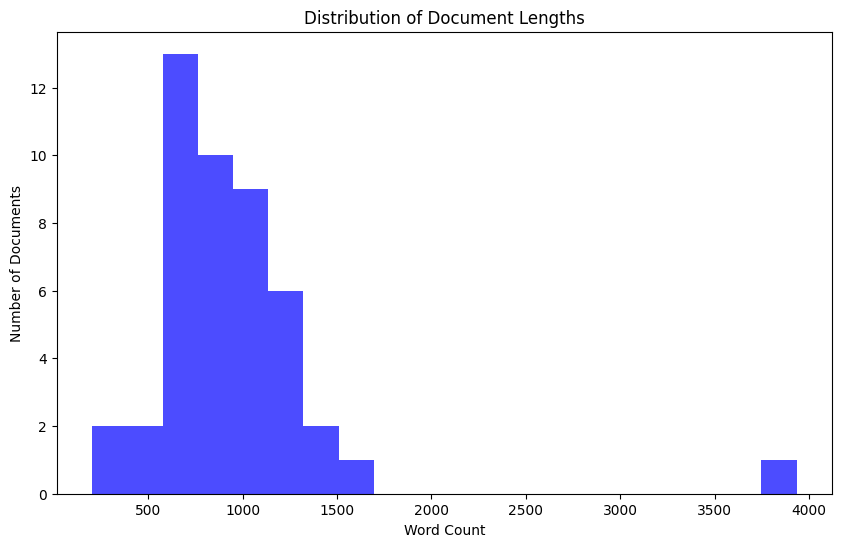

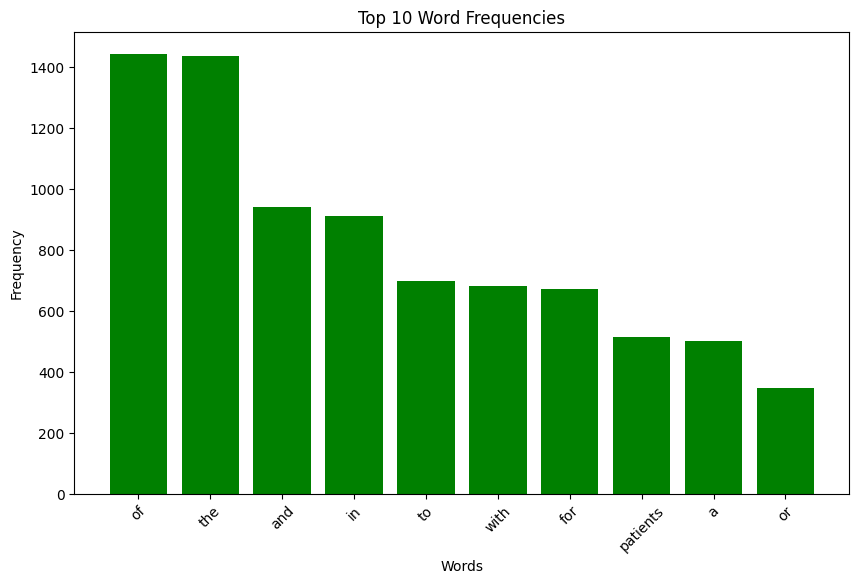

In [15]:
# DESCRIPTIVE STATISTICS: Word Frequencies and Document Lengths
import os
import fitz
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

# 1. Document Lengths
doc_lengths = [pdf['word_count'] for pdf in pdf_texts]
avg_doc_length = np.mean(doc_lengths)
median_doc_length = np.median(doc_lengths)

print(f"Average document length: {avg_doc_length:.2f} words")
print(f"Median document length: {median_doc_length:.2f} words")

# 2. Word Frequency Distribution
all_words = ' '.join([pdf['text'] for pdf in pdf_texts]).split()
word_freq = Counter(all_words)

# Top 10 most frequent words
print("Top 10 most frequent words:")
for word, count in word_freq.most_common(10):
    print(f"{word}: {count}")

# 3. Plotting the document lengths distribution
plt.figure(figsize=(10, 6))
plt.hist(doc_lengths, bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Document Lengths')
plt.xlabel('Word Count')
plt.ylabel('Number of Documents')
plt.show()

# 4. Plotting word frequencies for top 10 words
top_words, top_counts = zip(*word_freq.most_common(10))

plt.figure(figsize=(10, 6))
plt.bar(top_words, top_counts, color='green')
plt.title('Top 10 Word Frequencies')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [12]:
def preprocess_text(pdf_texts):
    """
    Preprocesses text by tokenizing, lowercasing, removing stop words, removing abbreviations, and lemmatizing.
    lemmatization, removal of stop words, abbreviations, converted all to lower case, removed contractions, numbers using regex, tokenized.

    Parameters:
    pdf_texts (dict): Dictionary containing "filename" and "text".

    Returns:
    dict: Dictionary with the same structure, but the "text" field preprocessed.
    """
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))

    # Define a list of known abbreviations/low information tokens to remove
    abbreviations = {'pfs', 'co.', 'co', 'also', 'vs', 'vs.', 'ok', 'etc.', 'v', 'n=', "''", 'et.', 'al', 'et', '--', 'o', "'s", "fig", "figure", 'til', 'le'}

    processed_texts = {}

    for entry in pdf_texts:
        text = entry['text']

        # Lowercase the text
        text = text.lower()

        # Expand contractions
        text = contractions.fix(text)

        # Remove numbers using regular expression
        text = re.sub(r'\d+', '', text)

        # Tokenize the text
        words = word_tokenize(text)

        # Remove stop words, punctuation, abbreviations, and lemmatize the words
        processed_words = [
            lemmatizer.lemmatize(word) #Lemmas are always actual words, reduces words to their base dictionary form
            for word in words
            if word not in stop_words and word not in string.punctuation
            and word not in abbreviations and len(word) > 1  # Remove abbreviations and single letters
        ]

        # Add the processed tokenized text back to the dictionary with the filename
        processed_texts[entry['filename']] = processed_words

    return processed_texts


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
#Preprocess text test
processed_texts = preprocess_text(pdf_texts)

# Extract the tokenized texts as a list of lists
tokenized_texts = list(processed_texts.values())
filenames = list(processed_texts.keys())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# Create a Dictionaty and a Corpus

# Create a Dictionary from the tokenized documents
dictionary = Dictionary(tokenized_texts)

# Print the dictionary to verify
#print(dictionary)

# Filter out too rare and too common words
dictionary.filter_extremes(no_below=5, no_above=0.5)

# Convert the tokenized documents into a bag-of-words corpus
corpus = [dictionary.doc2bow(doc) for doc in tokenized_texts]
#print(corpus)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence score for 2 topics: 0.48136209095830484
Coherence score for 3 topics: 0.5094689763234207
Coherence score for 4 topics: 0.5040262621455351
Coherence score for 5 topics: 0.5346411338778412
Coherence score for 6 topics: 0.5977827995238134
Coherence score for 7 topics: 0.585240425581251
Coherence score for 8 topics: 0.5617158453923823
Coherence score for 9 topics: 0.5283017280267178
Coherence score for 10 topics: 0.5322082006152714
Coherence score for 11 topics: 0.5244781807856641
Coherence score for 12 topics: 0.5289314719280632
Coherence score for 13 topics: 0.5272015718559744
Coherence score for 14 topics: 0.5358703779596716


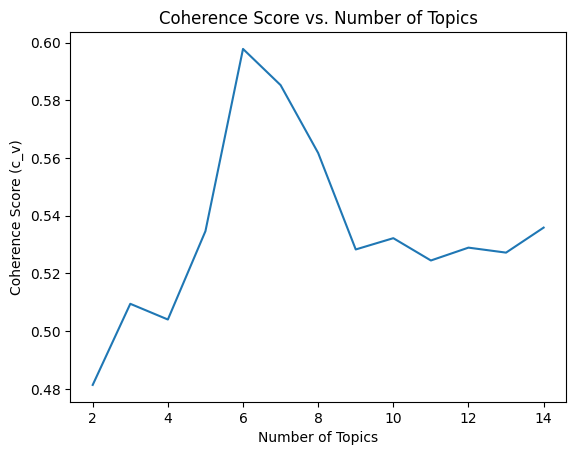

In [21]:
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Define a function to compute the coherence score for a given number of topics
def compute_coherence_values(corpus, dictionary, texts, start=2, limit=10, step=1):
    coherence_values = []
    model_list = []

    for num_topics in range(start, limit, step):
        # Train LDA model for each number of topics
        lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42,passes=15, iterations=150, chunksize=100 )
        model_list.append(lda_model)

        # Compute coherence score using 'c_v' metric
        coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model_lda.get_coherence()
        coherence_values.append(coherence_score)

        print(f'Coherence score for {num_topics} topics: {coherence_score}')

    return model_list, coherence_values


# Apply coherence analysis
model_list, coherence_values = compute_coherence_values(corpus, dictionary, texts=tokenized_texts, start=2, limit=15, step=1)

# Plot coherence score results to visualize the optimal number of topics
x = range(2, 15)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score (c_v)")
plt.title("Coherence Score vs. Number of Topics")
plt.show()

# Select the optimal model based on the highest coherence score
optimal_num_topics = coherence_values.index(max(coherence_values)) + 2  # Adjust for start index
optimal_lda_model = model_list[optimal_num_topics - 2]

# Get the topic distributions for each document from the optimal model
lda_corpus = optimal_lda_model[corpus]

# Convert LDA results into a matrix (document-topic distribution)
lda_matrix = []
for doc in lda_corpus:
    doc_topics = [0] * optimal_lda_model.num_topics
    for topic_num, prob in doc:
        doc_topics[topic_num] = prob
    lda_matrix.append(doc_topics)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


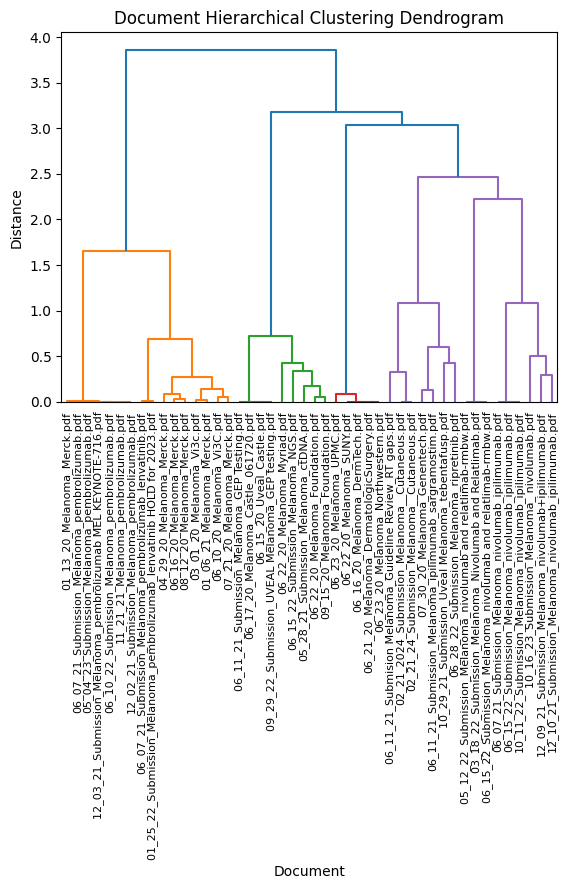

In [23]:
# Hierarchical clustering using the LDA topic distributions
linkage_matrix = linkage(lda_matrix, method='ward')
dendrogram(linkage_matrix, labels=filenames, leaf_rotation=90)
plt.title('Document Hierarchical Clustering Dendrogram')
plt.xlabel('Document')
plt.ylabel('Distance')
plt.show()


In [24]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary

# Prepare the pyLDAvis visualization data
lda_vis_data = gensimvis.prepare(optimal_lda_model, corpus, dictionary)

# Show the pyLDAvis visualization in a notebook or save as an HTML file
pyLDAvis.display(lda_vis_data)  # For displaying in a Jupyter notebook



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
# Extract the most salient terms from the prepared pyLDAvis data
term_info = lda_vis_data.token_table # Access the 'token_table' attribute using dot notation

# Sort the terms by relevance and frequency
top_terms = term_info.sort_values(by='Freq', ascending=False).head(10)

# Display the most salient terms and their frequency
print("Top 10 most salient terms and their frequency:")
print(top_terms[['Term', 'Freq']])

Top 10 most salient terms and their frequency:
            Term      Freq
term                      
527      opdivo®  0.983772
229          gep  0.983173
307          ipi  0.982298
562          iic  0.982204
561          iib  0.981150
265    profiling  0.978080
202   biomarkers  0.974682
536      yervoy®  0.973025
345    pigmented  0.970292
471          dor  0.968502


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
from collections import defaultdict

# Initialize a dictionary to store word frequencies
word_counts = defaultdict(int)

# Loop through the corpus and count the occurrences of each word
for doc in corpus:
    for word_id, freq in doc:
        word_counts[word_id] += freq

# Convert the word IDs back to words and print the 10 most frequent words
most_common_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 words by frequency in the corpus:")
for word_id, count in most_common_words:
    print(f"{dictionary[word_id]}: {count}")


Top 10 words by frequency in the corpus:
pembrolizumab: 211
nivolumab: 139
test: 134
therapy: 130
cancer: 126
arm: 123
stage: 119
ipilimumab: 110
o: 102
group: 97


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
